In [4]:
import pandas as pd
import numpy as np

In [5]:
a = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')
a.head(5)

<ipython-input-5-6ef1b04b0af3>:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [6]:
import pandas as pd
import numpy as np

# Load the dataset with low_memory=False to avoid DtypeWarning
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Step 1: Set Amount to 0 where Status is 'Cancelled'
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

# Step 2: Calculate the median of the Amount column (excluding 0s from cancelled orders)
median_amount = df[df['Status'] != 'Cancelled']['Amount'].median()

# Step 3: Replace null values in the Amount column with the median
df['Amount'] = df['Amount'].fillna(median_amount)

# Save the updated DataFrame (optional)
df.to_csv('updated_sales_dataset.csv', index=False)

print(df.head())  # Print the first few rows to verify

              Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency Amount    ship-city   ship-state  s

In [7]:
a.describe()

,Qty,Amount,ship-postal-code
count,128949.000000,121155.000000,128916.000000
mean,0.904629,648.550806,463978.298008
std,0.314782,281.218324,191473.322953
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [8]:
a.count()

Order ID              128949
Date                  128949
Status                128949
Fulfilment            128949
Sales Channel         128949
ship-service-level    128949
Style                 128949
SKU                   128949
Category              128949
Size                  128949
ASIN                  128949
Courier Status        122078
Qty                   128949
currency              121155
Amount                121155
ship-city             128916
ship-state            128916
ship-postal-code      128916
ship-country          128916
promotion-ids          79807
B2B                   128949
fulfilled-by           39270
Unnamed: 22            79908
dtype: int64

# **Financial Performance**

**1)calculate the total revnue**

In [9]:
import pandas as pd
import numpy as np

# Read the dataset with low_memory=False to handle mixed types
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Replace null values in numerical columns with median
numerical_cols = ["Amount", "Qty"]
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)  # Avoid inplace=True

# Replace null values in categorical columns with mode
categorical_cols = ["Status", "ship-city", "ship-state"]
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)  # Avoid inplace=True

# Set Amount to 0 for cancelled orders
df.loc[df["Status"] == "Cancelled", "Amount"] = 0

# Calculate total revenue
total_revenue = df["Amount"].sum()

print("Processed DataFrame:")
print(df.head())  # Display the first few rows for verification
print("\nTotal Revenue:", total_revenue)

Processed DataFrame:
              Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency Amount    ship

** 2)calculate the top selling product**

<ipython-input-10-b4fb85cf4209>:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')


        Category    Qty
5            Set  45288
8          kurta  45049
7  Western Dress  13943
6            Top   9902
3   Ethnic Dress   1052
0         Blouse    864
1         Bottom    398
4          Saree    152
2        Dupatta      3


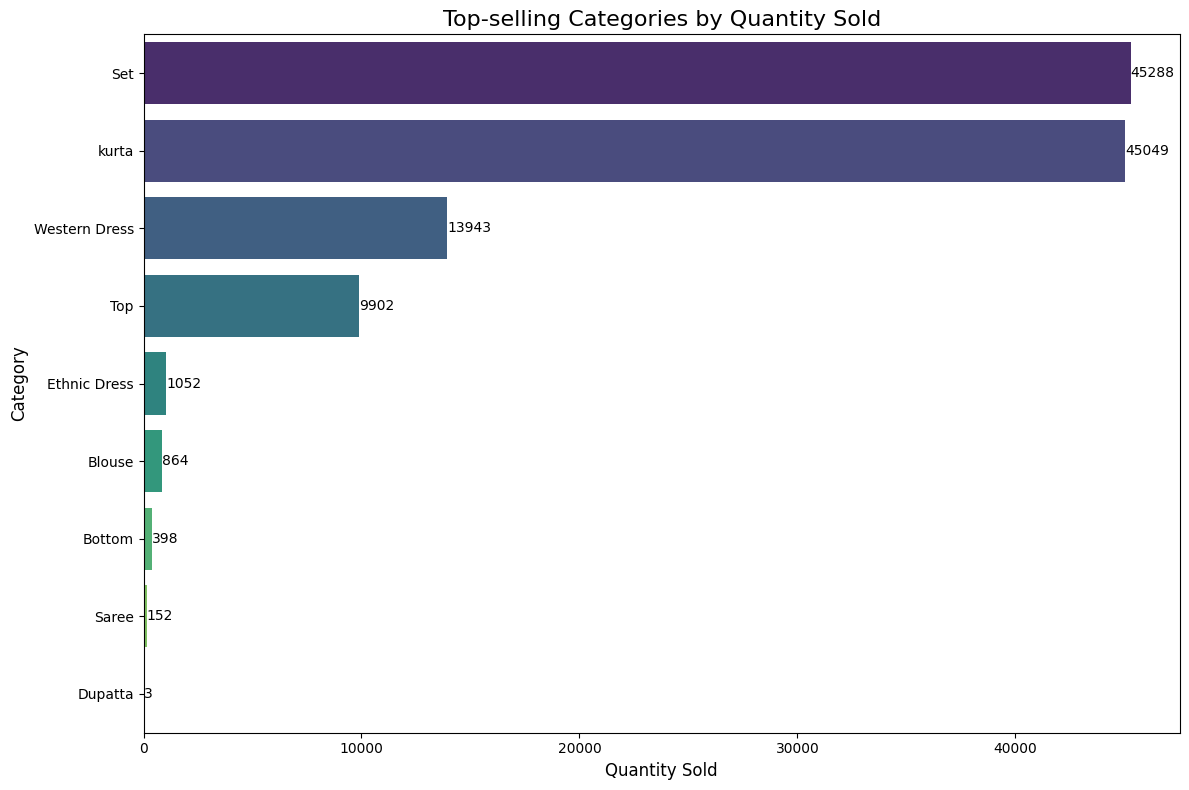

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')

# Group by 'Category' and calculate the total quantity sold for each category
category_sales = df.groupby('Category')['Qty'].sum().reset_index()

# Sort the categories by quantity sold in descending order
category_sales_sorted = category_sales.sort_values(by='Qty', ascending=False)

# Display the sorted data
print(category_sales_sorted)

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Qty', y='Category', data=category_sales_sorted, palette='viridis')

# Set the title and labels
plt.title('Top-selling Categories by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add data labels on top of the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1,  # x-coordinate (slightly offset from the bar)
             p.get_y() + p.get_height() / 2,  # y-coordinate (middle of the bar)
             f'{int(width)}',  # Label text (quantity sold)
             ha='left', va='center', fontsize=10)  # Alignment and font size

# Show the plot
plt.tight_layout()
plt.show()

**3)**calculate the avarage order value****

In [11]:
import pandas as pd

# Load the CSV file with low_memory=False to avoid dtype warning
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Calculate total sales (sum of 'Amount') and total number of unique orders (count of 'Order ID')
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()

# Calculate Average Order Value (AOV) in the original currency
aov = total_sales / total_orders

# Print the result
print(f"The Average Order Value (AOV) in the original currency is: {aov:.2f}")


The Average Order Value (AOV) in the original currency is: 652.88


**4)Identifying peak sales periods**

<ipython-input-12-6e8a56d33c2d>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


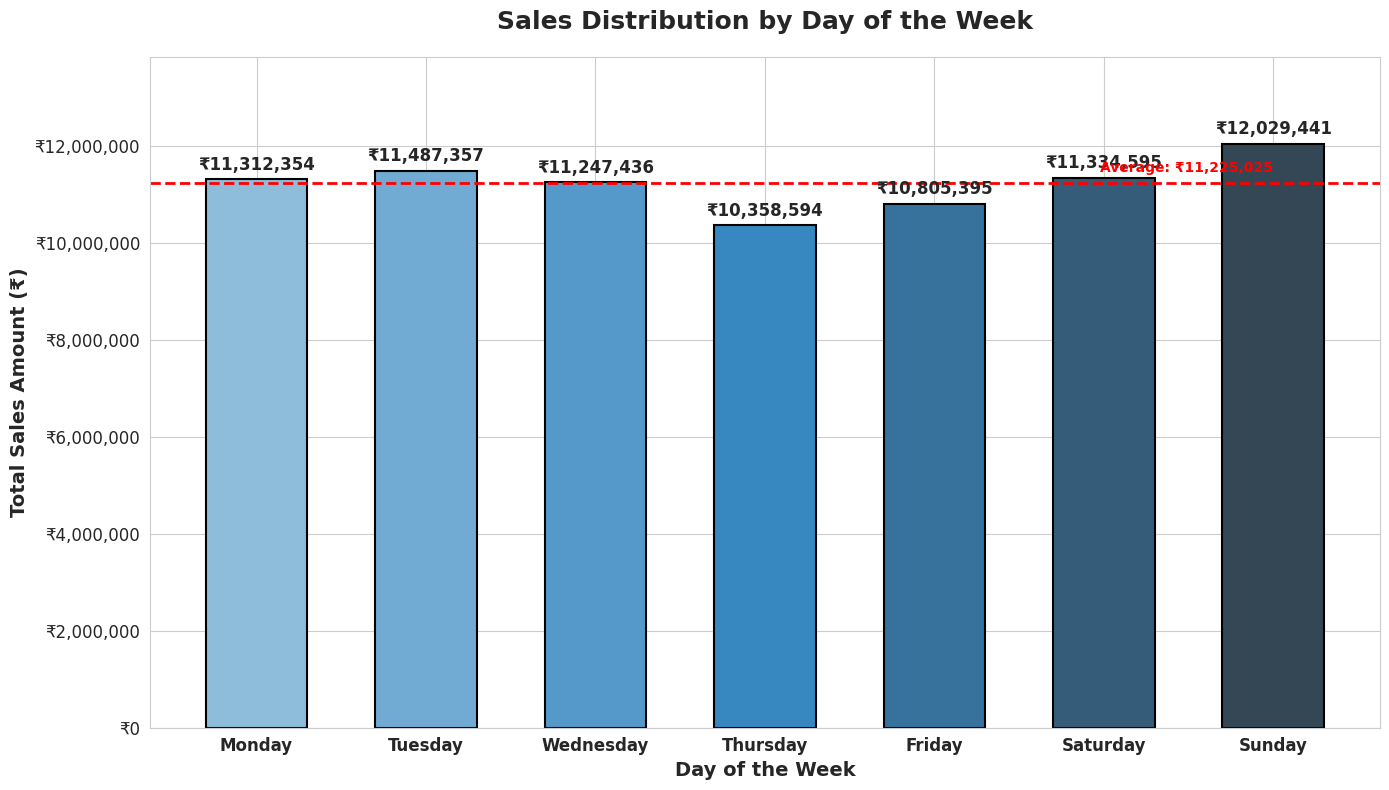

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Group by day of the week and calculate total sales
sales_by_day = df.groupby('Day_of_Week')['Amount'].sum().reset_index()

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['Day_of_Week'] = pd.Categorical(sales_by_day['Day_of_Week'], categories=day_order, ordered=True)
sales_by_day = sales_by_day.sort_values('Day_of_Week')

# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create the bar plot with improved colors
bars = plt.bar(sales_by_day['Day_of_Week'], sales_by_day['Amount'], 
               color=sns.color_palette("Blues_d", len(sales_by_day)),
               width=0.6, edgecolor='black', linewidth=1.5)

# Add data labels with better formatting and positioning
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01*height,
             f'₹{height:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Enhance overall appearance
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales Amount (₹)', fontsize=14, fontweight='bold')
plt.title('Sales Distribution by Day of the Week', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Format y-axis with commas and sufficient spacing
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
plt.ylim(0, sales_by_day['Amount'].max() * 1.15)  # Add 15% space above the highest bar

# Add a horizontal line showing the average sales
avg_sales = sales_by_day['Amount'].mean()
plt.axhline(y=avg_sales, color='red', linestyle='--', linewidth=2)
plt.text(len(sales_by_day)-1, avg_sales*1.02, f'Average: ₹{avg_sales:,.0f}', 
         color='red', fontweight='bold', ha='right')

# Improve the overall layout
plt.tight_layout()
plt.savefig('sales_by_day.png', dpi=300, bbox_inches='tight')
plt.show()

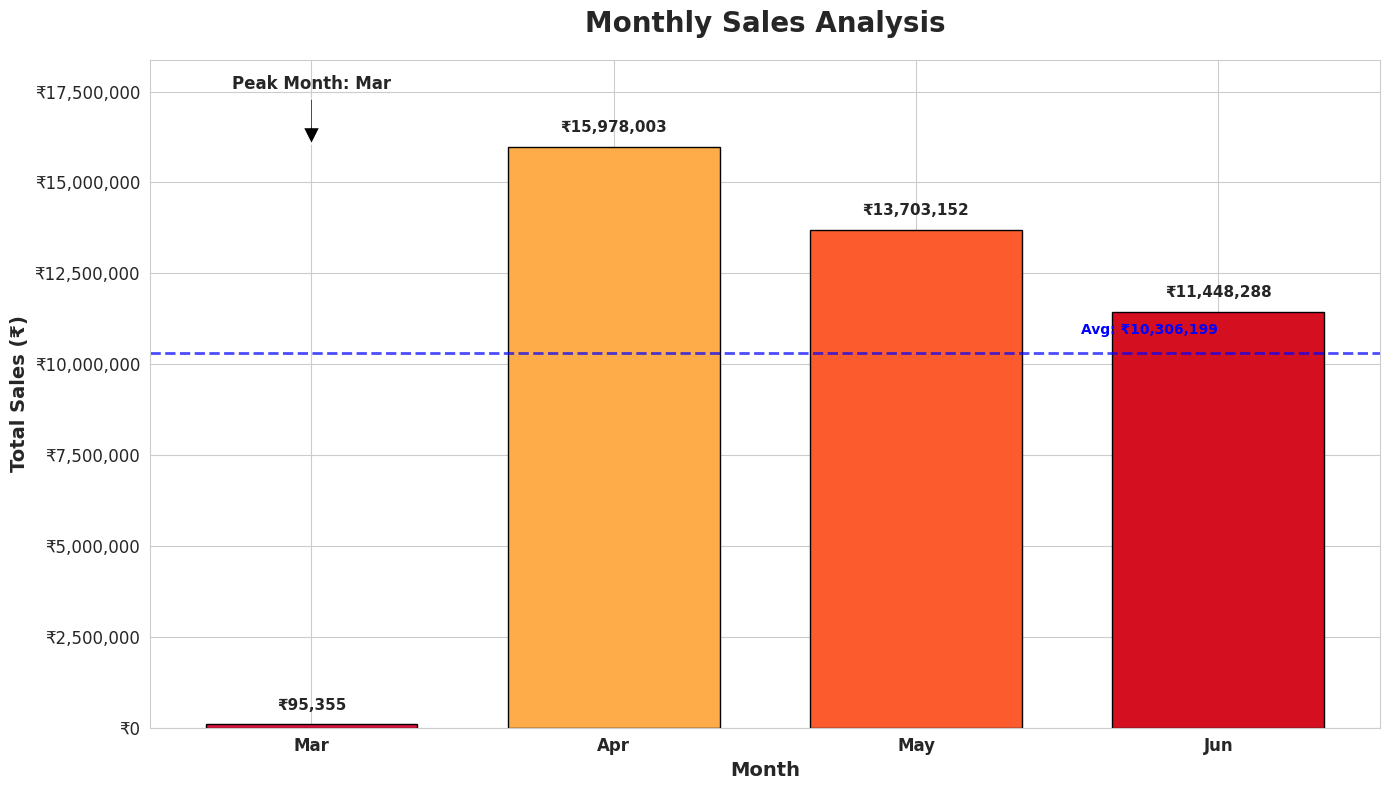


Peak Sales Period: Apr with Total Sales of ₹15,978,002.62


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Convert Date column to datetime using the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Set Amount to 0 for cancelled orders
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

# Replace null values in Amount with the median
median_amount = df['Amount'].median()
df['Amount'] = df['Amount'].fillna(median_amount)

# Extract month from Date and map to abbreviated month names (e.g., Mar, Apr)
df['Month'] = df['Date'].dt.month_name().str[:3]

# Group by Month and calculate total sales
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical variable with the correct order
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)

# Sort by the correct month order
monthly_sales = monthly_sales.sort_values('Month')

# Set a professional style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create bar plot with enhanced appearance
bars = plt.bar(monthly_sales['Month'], monthly_sales['Amount'], 
               color=sns.color_palette("YlOrRd", len(monthly_sales)), 
               width=0.7, edgecolor='black', linewidth=1)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02*monthly_sales['Amount'].max(),
            f'₹{height:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Identify peak sales month and highlight it
peak_month_idx = monthly_sales['Amount'].idxmax()
bars[peak_month_idx].set_color('crimson')
bars[peak_month_idx].set_edgecolor('black')

# Add a line showing the average monthly sales
avg_sales = monthly_sales['Amount'].mean()
plt.axhline(y=avg_sales, color='blue', linestyle='--', linewidth=2, alpha=0.7)
plt.text(len(monthly_sales)-1, avg_sales*1.05, f'Avg: ₹{avg_sales:,.0f}', 
         color='blue', fontweight='bold', ha='right')

# Enhance the plot appearance
plt.title('Monthly Sales Analysis', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales (₹)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Format y-axis with commas for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'₹{int(x):,}'))

# Add some space above the highest bar for labels
plt.ylim(0, monthly_sales['Amount'].max() * 1.15)

# Annotate the peak month
plt.annotate(f'Peak Month: {monthly_sales.iloc[peak_month_idx]["Month"]}',
             xy=(peak_month_idx, monthly_sales['Amount'].max()),
             xytext=(peak_month_idx, monthly_sales['Amount'].max() * 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12, fontweight='bold', ha='center')

# Improve overall layout
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('monthly_sales_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print peak sales period
peak_month = monthly_sales.loc[monthly_sales['Amount'].idxmax()]
print(f"\nPeak Sales Period: {peak_month['Month']} with Total Sales of ₹{peak_month['Amount']:,.2f}")

# Customer Insights

**1)Identifying top-performing locations basedon sales volume.**

Top 10 Cities by Sales Volume:
      ship-city    Qty
776   BENGALURU  10420
2906  HYDERABAD   7333
4795     MUMBAI   5648
5393  NEW DELHI   5251
1466    CHENNAI   4936
6158       PUNE   3532
3712    KOLKATA   2166
2620   GURUGRAM   1733
7587      THANE   1541
4397    LUCKNOW   1283

Top 10 States by Sales Volume:
        ship-state    Qty
28     MAHARASHTRA  20326
23       KARNATAKA  15901
56      TAMIL NADU  10414
57       TELANGANA  10255
59   UTTAR PRADESH   9497
14           DELHI   6155
24          KERALA   5815
61     WEST BENGAL   5316
1   ANDHRA PRADESH   4819
18         Gujarat   4152


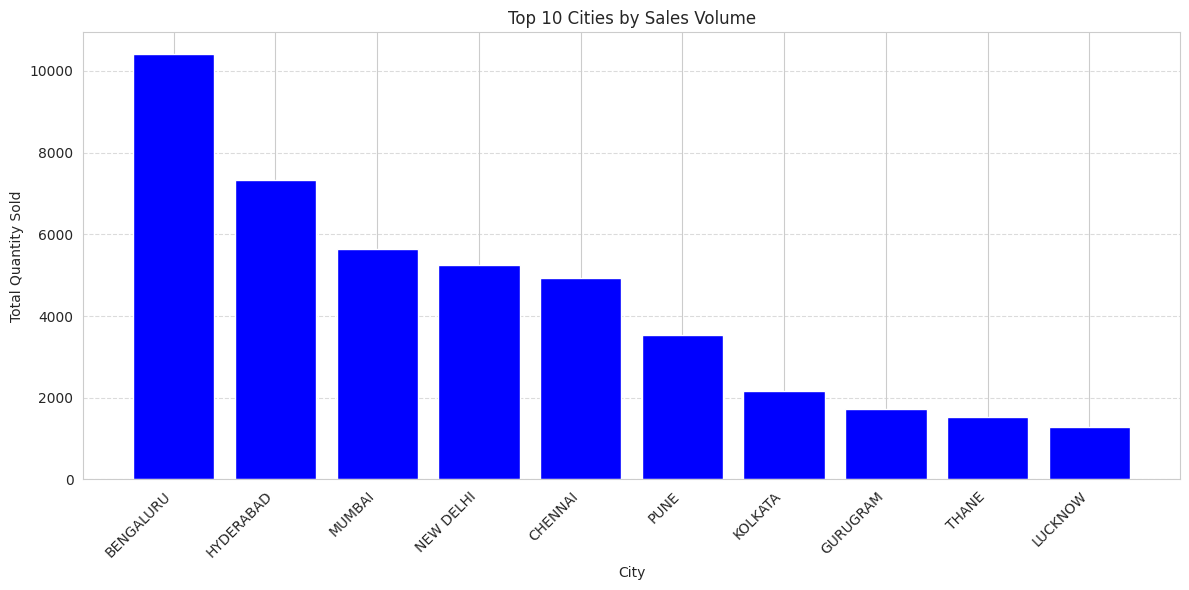

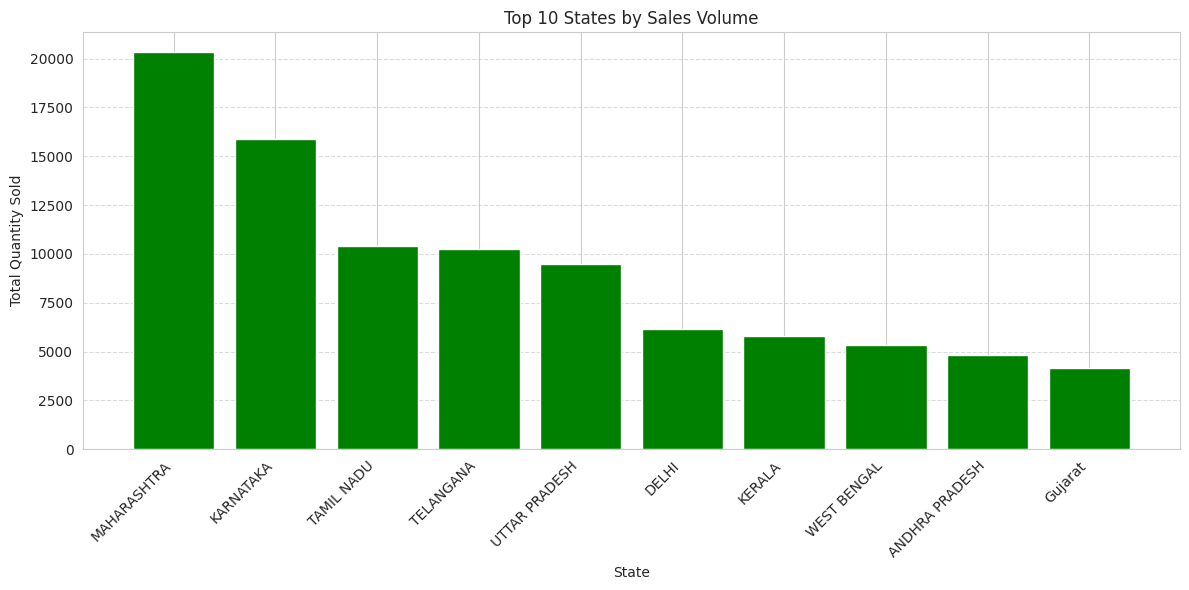

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with low_memory=False to avoid dtype warning
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Group by 'ship-city' and calculate total sales (using 'Qty' or 'Amount')
city_sales = df.groupby('ship-city')['Qty'].sum().reset_index()

# Sort cities by total quantity sold in descending order
top_cities = city_sales.sort_values(by='Qty', ascending=False)

# Display top-performing locations (top 10 cities based on sales volume)
print("Top 10 Cities by Sales Volume:")
print(top_cities.head(10))

# Group by 'ship-state' and calculate total sales (using 'Qty' or 'Amount')
state_sales = df.groupby('ship-state')['Qty'].sum().reset_index()

# Sort states by total quantity sold in descending order
top_states = state_sales.sort_values(by='Qty', ascending=False)

# Display top-performing states (top 10 states based on sales volume)
print("\nTop 10 States by Sales Volume:")
print(top_states.head(10))

# Plot City-wise Sales (Top 10 Cities)
plt.figure(figsize=(12, 6))
plt.bar(top_cities['ship-city'].head(10), top_cities['Qty'].head(10), color='blue')
plt.title('Top 10 Cities by Sales Volume')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot State-wise Sales (Top 10 States)
plt.figure(figsize=(12, 6))
plt.bar(top_states['ship-state'].head(10), top_states['Qty'].head(10), color='green')
plt.title('Top 10 States by Sales Volume')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2)Analyzing order cancellation trends and customer retention**


Starting analysis...
Available columns in the dataset:
['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


<ipython-input-15-8cd6bb27d503>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])



    Sales Analysis Report
    
    Cancellation Metrics:
    - Overall Cancellation Rate: 14.22%
    - Highest Monthly Cancellation Rate: 14.55%
    - Lowest Monthly Cancellation Rate: 10.53%
    
    Customer Retention Metrics:
    - Total Unique Customers: 18,027
    - Repeat Customer Rate: 54.85%
    - Average Orders per Customer: 7.15
    - Average Customer Lifetime Value: $4357.71
    
    Order Status Distribution:
    Status
Shipped                          77767
Shipped - Delivered to Buyer     28771
Cancelled                        18341
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
    


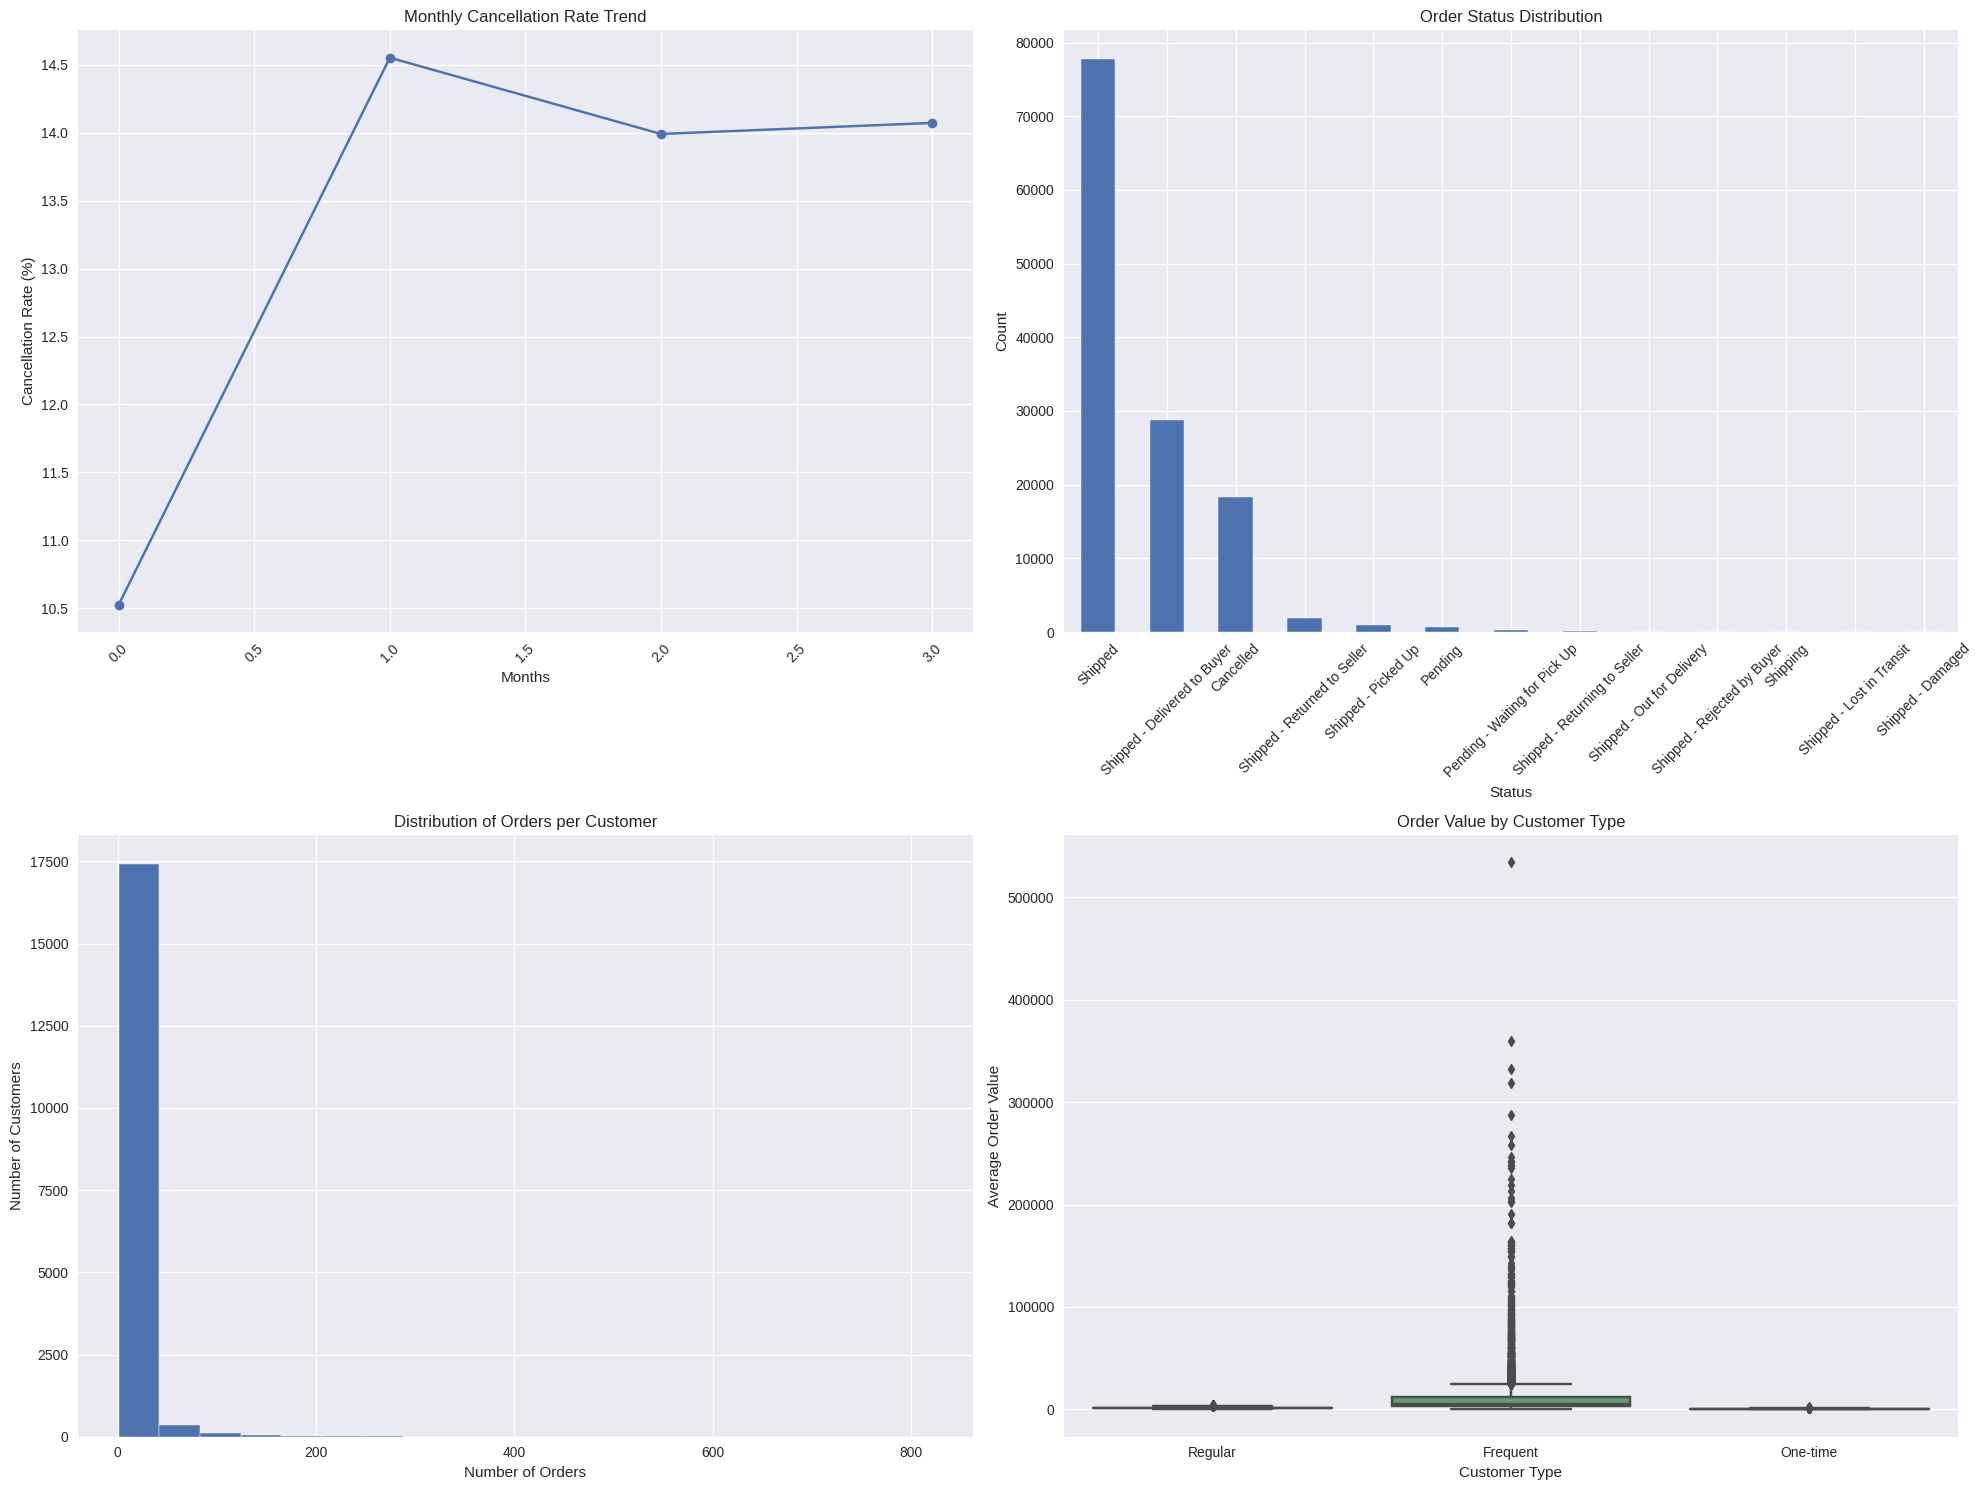

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_sales_data(filepath):
    # Read the dataset with low_memory=False to avoid DtypeWarning
    df = pd.read_csv(filepath, low_memory=False)
    
    # Print column names to verify
    print("Available columns in the dataset:")
    print(df.columns.tolist())
    
    # Convert Date to datetime with error handling
    try:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.to_period('M')
        df['Year'] = df['Date'].dt.year
    except Exception as e:
        print(f"Error processing date column: {e}")
        return None, None
    
    # Calculate cancellation metrics
    df['is_cancelled'] = df['Status'].str.lower().str.contains('cancel', na=False)
    
    # 1. Monthly Cancellation Analysis
    monthly_cancellations = df.groupby('Month').agg({
        'is_cancelled': ['count', 'sum']
    })
    monthly_cancellations['rate'] = (
        monthly_cancellations[('is_cancelled', 'sum')] / 
        monthly_cancellations[('is_cancelled', 'count')] * 100
    )
    
    # 2. Customer Retention Analysis
    # Using try-except to handle potential missing columns
    try:
        customer_orders = df.groupby(['ship-postal-code', 'ship-city']).agg({
            'Order ID': 'count',
            'Amount': 'sum'
        }).reset_index()
        
        retention_metrics = {
            'total_customers': len(customer_orders),
            'repeat_customers': len(customer_orders[customer_orders['Order ID'] > 1]),
            'avg_orders_per_customer': customer_orders['Order ID'].mean(),
            'avg_customer_value': customer_orders['Amount'].mean()
        }
    except KeyError as e:
        print(f"Error in customer retention analysis: Missing column {e}")
        return None, None
    
    # Create visualizations
    plt.style.use('seaborn-v0_8')  # Updated style name
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Monthly Cancellation Rate Trend
    plt.subplot(2, 2, 1)
    plt.plot(range(len(monthly_cancellations)), monthly_cancellations['rate'], marker='o')
    plt.title('Monthly Cancellation Rate Trend')
    plt.xlabel('Months')
    plt.ylabel('Cancellation Rate (%)')
    plt.xticks(rotation=45)
    
    # 2. Status Distribution (instead of Sales Channel)
    plt.subplot(2, 2, 2)
    status_dist = df['Status'].value_counts()
    status_dist.plot(kind='bar')
    plt.title('Order Status Distribution')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # 3. Customer Order Distribution
    plt.subplot(2, 2, 3)
    plt.hist(customer_orders['Order ID'], bins=20)
    plt.title('Distribution of Orders per Customer')
    plt.xlabel('Number of Orders')
    plt.ylabel('Number of Customers')
    
    # 4. Average Order Value by Customer Frequency
    plt.subplot(2, 2, 4)
    customer_orders['customer_type'] = customer_orders['Order ID'].apply(
        lambda x: 'One-time' if x == 1 else ('Regular' if x <= 3 else 'Frequent')
    )
    sns.boxplot(data=customer_orders, x='customer_type', y='Amount')
    plt.title('Order Value by Customer Type')
    plt.xlabel('Customer Type')
    plt.ylabel('Average Order Value')
    
    plt.tight_layout()
    
    # Generate summary report
    report = f"""
    Sales Analysis Report
    ====================
    
    Cancellation Metrics:
    - Overall Cancellation Rate: {df['is_cancelled'].mean() * 100:.2f}%
    - Highest Monthly Cancellation Rate: {monthly_cancellations['rate'].max():.2f}%
    - Lowest Monthly Cancellation Rate: {monthly_cancellations['rate'].min():.2f}%
    
    Customer Retention Metrics:
    - Total Unique Customers: {retention_metrics['total_customers']:,}
    - Repeat Customer Rate: {(retention_metrics['repeat_customers'] / retention_metrics['total_customers'] * 100):.2f}%
    - Average Orders per Customer: {retention_metrics['avg_orders_per_customer']:.2f}
    - Average Customer Lifetime Value: ${retention_metrics['avg_customer_value']:.2f}
    
    Order Status Distribution:
    {df['Status'].value_counts().to_string()}
    """
    
    return report, fig

# Execute the analysis
print("Starting analysis...")
report, visualizations = analyze_sales_data('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')
if report and visualizations:
    print(report)
    plt.show()

**3)differentiating B2B vs. B2C customer behavior for targeted marketing based on sales volume**

<ipython-input-16-20ce42a2662e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


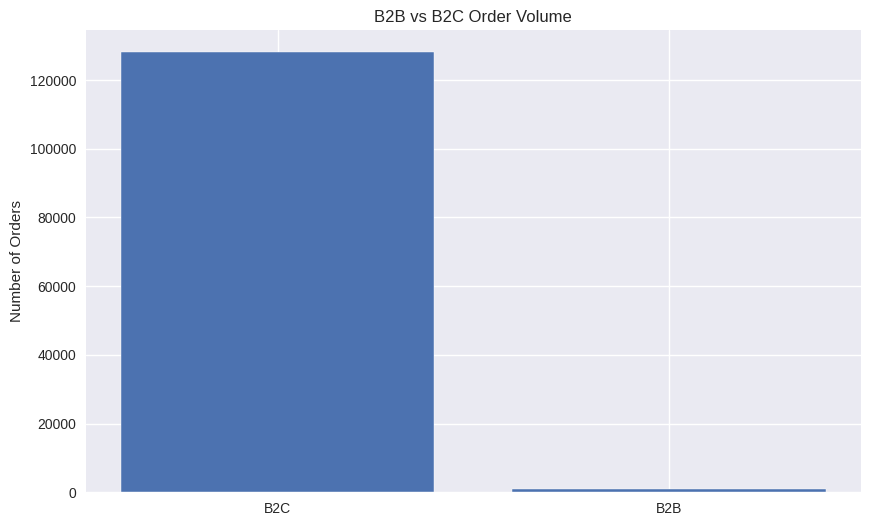

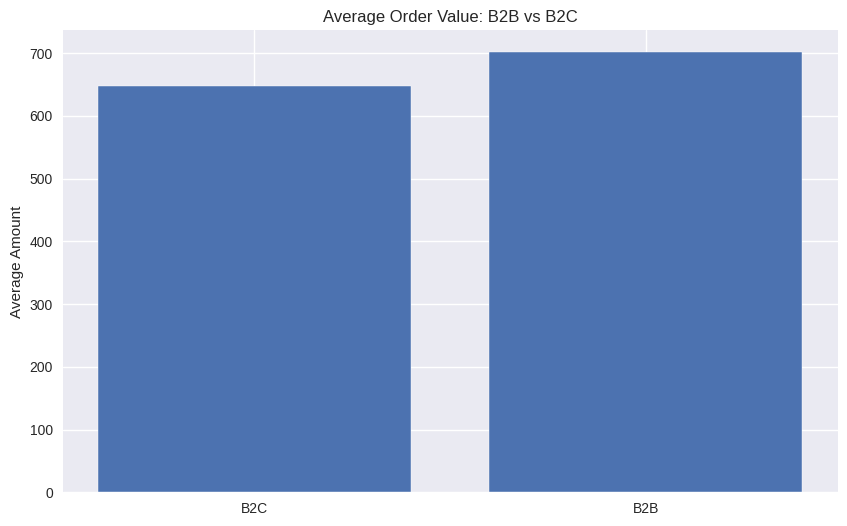

<ipython-input-16-20ce42a2662e>:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<Figure size 1200x600 with 0 Axes>

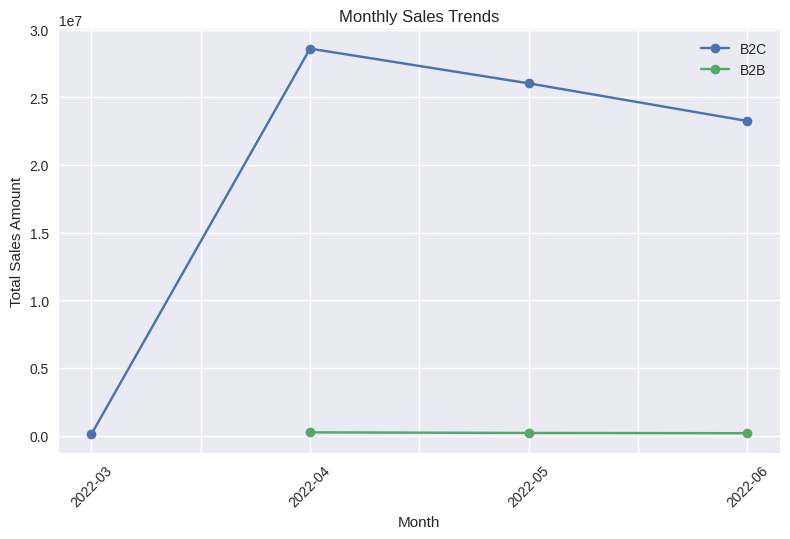

<Figure size 1200x600 with 0 Axes>

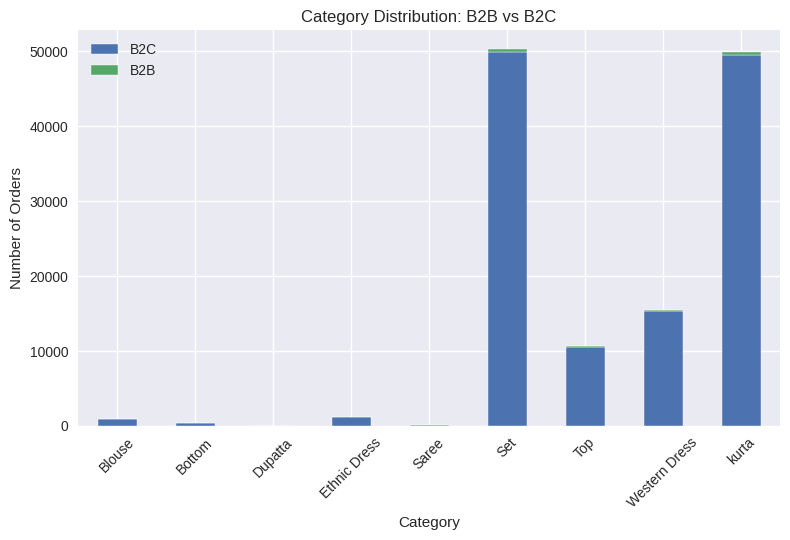

<Figure size 1200x600 with 0 Axes>

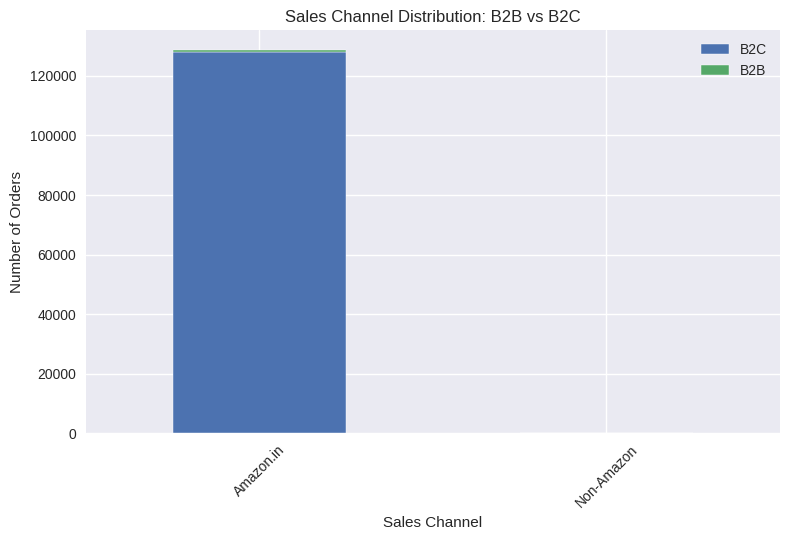


B2B vs B2C Analysis Summary:

Detailed Statistics:
                                  B2B          B2C
Total Orders                   871.00    128078.00
Total Sales                 591220.79  77983952.15
Average Order Value            701.33       648.18
Total Quantity                 841.00    115810.00
Average Quantity per Order       0.97         0.90

Marketing Recommendations:

B2B Marketing Strategies:
- Focus on bulk order discounts and volume-based pricing
- Implement tiered pricing structures
- Provide dedicated account management

B2C Marketing Strategies:
- Implement customer loyalty programs
- Focus on personalized marketing
- Create seasonal promotions


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

# Set the style for better visualizations
plt.style.use('seaborn')

# 1. B2B vs B2C Order Volume Comparison
plt.figure(figsize=(10, 6))
order_counts = df.groupby('B2B')['Order ID'].count()
plt.bar(['B2C', 'B2B'], [order_counts[False], order_counts[True]])
plt.title('B2B vs B2C Order Volume')
plt.ylabel('Number of Orders')
plt.show()

# 2. Average Order Value Comparison
plt.figure(figsize=(10, 6))
avg_order = df.groupby('B2B')['Amount'].mean()
plt.bar(['B2C', 'B2B'], [avg_order[False], avg_order[True]])
plt.title('Average Order Value: B2B vs B2C')
plt.ylabel('Average Amount')
plt.show()

# 3. Monthly Sales Trends
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')
monthly_sales = df.groupby(['Month', 'B2B'])['Amount'].sum().unstack()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(['B2C', 'B2B'])
plt.tight_layout()
plt.show()

# 4. Category Distribution
plt.figure(figsize=(12, 6))
category_dist = pd.crosstab(df['Category'], df['B2B'])
category_dist.plot(kind='bar', stacked=True)
plt.title('Category Distribution: B2B vs B2C')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(['B2C', 'B2B'])
plt.tight_layout()
plt.show()

# 5. Sales Channel Analysis
plt.figure(figsize=(12, 6))
channel_dist = pd.crosstab(df['Sales Channel '], df['B2B'])
channel_dist.plot(kind='bar', stacked=True)
plt.title('Sales Channel Distribution: B2B vs B2C')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(['B2C', 'B2B'])
plt.tight_layout()
plt.show()

# Print numerical analysis
print("\nB2B vs B2C Analysis Summary:")
print("============================")

# Calculate statistics separately to avoid MultiIndex
b2b_summary = {
    'Total Orders': len(df[df['B2B']]),
    'Total Sales': df[df['B2B']]['Amount'].sum(),
    'Average Order Value': df[df['B2B']]['Amount'].mean(),
    'Total Quantity': df[df['B2B']]['Qty'].sum(),
    'Average Quantity per Order': df[df['B2B']]['Qty'].mean()
}

b2c_summary = {
    'Total Orders': len(df[~df['B2B']]),
    'Total Sales': df[~df['B2B']]['Amount'].sum(),
    'Average Order Value': df[~df['B2B']]['Amount'].mean(),
    'Total Quantity': df[~df['B2B']]['Qty'].sum(),
    'Average Quantity per Order': df[~df['B2B']]['Qty'].mean()
}

# Create comparison DataFrame
stats_comparison = pd.DataFrame({
    'B2B': b2b_summary,
    'B2C': b2c_summary
}).round(2)

print("\nDetailed Statistics:")
print(stats_comparison)

# Print marketing recommendations
print("\nMarketing Recommendations:")
print("\nB2B Marketing Strategies:")
print("- Focus on bulk order discounts and volume-based pricing")
print("- Implement tiered pricing structures")
print("- Provide dedicated account management")

print("\nB2C Marketing Strategies:")
print("- Implement customer loyalty programs")
print("- Focus on personalized marketing")
print("- Create seasonal promotions")

# LOGISTICS &FULFILLMENTOPTIMIZATION

1)**Addressing shipping delays by calculatingaverage shipping times.**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_shipping_times(filepath):
    # Read the dataset
    print("Reading dataset...")
    df = pd.read_csv(filepath, low_memory=False)
    
    # Print sample of the Date column
    print("\nSample of Date column values:")
    print(df['Date'].head())
    
    # Print available columns
    print("\nAvailable columns:")
    print(df.columns.tolist())
    
    # Create a figure with proper spacing
    plt.figure(figsize=(20, 15))
    gs = plt.GridSpec(2, 2, figure=plt.gcf())
    gs.update(wspace=0.3, hspace=0.4)
    
    # 1. Service Level Analysis
    ax1 = plt.subplot(gs[0, 0])
    if 'ship-service-level' in df.columns:
        service_level_counts = df['ship-service-level'].value_counts()
        service_level_counts.plot(kind='bar', ax=ax1)
        ax1.set_title('Distribution by Shipping Service Level')
        ax1.set_xlabel('Service Level')
        ax1.set_ylabel('Count')
    else:
        ax1.text(0.5, 0.5, 'No shipping service level data available', 
                ha='center', va='center')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 2. Status Distribution
    ax2 = plt.subplot(gs[0, 1])
    status_dist = df['Status'].value_counts()
    status_dist.plot(kind='bar', ax=ax2)
    ax2.set_title('Order Status Distribution')
    ax2.set_xlabel('Status')
    ax2.set_ylabel('Count')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 3. State Distribution
    ax3 = plt.subplot(gs[1, 0])
    if 'ship-state' in df.columns:
        state_dist = df['ship-state'].value_counts().head(10)
        state_dist.plot(kind='bar', ax=ax3)
        ax3.set_title('Top 10 States by Order Volume')
        ax3.set_xlabel('State')
        ax3.set_ylabel('Count')
    else:
        ax3.text(0.5, 0.5, 'No state data available', 
                ha='center', va='center')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 4. Courier Analysis
    ax4 = plt.subplot(gs[1, 1])
    if 'Courier Status' in df.columns:
        courier_dist = df['Courier Status'].value_counts()
        courier_dist.plot(kind='bar', ax=ax4)
        ax4.set_title('Distribution by Courier Status')
        ax4.set_xlabel('Courier Status')
        ax4.set_ylabel('Count')
    else:
        ax4.text(0.5, 0.5, 'No courier status data available', 
                ha='center', va='center')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Generate summary statistics
    summary_stats = {
        'total_orders': len(df),
        'unique_states': df['ship-state'].nunique() if 'ship-state' in df.columns else 'N/A',
        'service_levels': df['ship-service-level'].nunique() if 'ship-service-level' in df.columns else 'N/A',
        'status_counts': df['Status'].value_counts()
    }
    
    # Generate summary report
    report = f"""
    Shipping Analysis Report
    =======================
    
    Overall Metrics:
    - Total Orders: {summary_stats['total_orders']:,}
    - States Served: {summary_stats['unique_states']}
    - Shipping Service Levels: {summary_stats['service_levels']}
    
    Order Status Distribution:
    {summary_stats['status_counts'].to_string()}
    
    """
    
    if 'ship-state' in df.columns:
        report += "\nTop 5 States by Order Volume:\n"
        report += df['ship-state'].value_counts().head().to_string()
    
    if 'ship-service-level' in df.columns:
        report += "\n\nShipping Service Level Distribution:\n"
        report += df['ship-service-level'].value_counts().to_string()
    
    report += """
    
    Recommendations:
    1. Order Status Management:
       - Monitor status distributions for anomalies
       - Identify potential bottlenecks in order processing
    
    2. Geographic Analysis:
       - Focus on high-volume states for optimization
       - Review service coverage in low-volume areas
    
    3. Service Level Optimization:
       - Evaluate service level utilization
       - Consider adjustments based on demand patterns
    """
    
    return report, plt.gcf()

# Execute the analysis
print("Starting shipping time analysis...")
report, visualizations = analyze_shipping_times('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')
print(report)
plt.tight_layout()
plt.show()

Starting shipping time analysis...
Reading dataset...

Sample of Date column values:
0    04-30-22
1    04-30-22
2    04-30-22
3    04-30-22
4    04-30-22
Name: Date, dtype: object

Available columns:
['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

    Shipping Analysis Report
    
    Overall Metrics:
    - Total Orders: 128,949
    - States Served: 69
    - Shipping Service Levels: 2
    
    Order Status Distribution:
    Status
Shipped                          77767
Shipped - Delivered to Buyer     28771
Cancelled                        18341
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipp

<ipython-input-17-8fb623982ab2>:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


KeyboardInterrupt: 

**2)Comparing orders fulfilled by Amazon vs.Merchant fulfillment.**

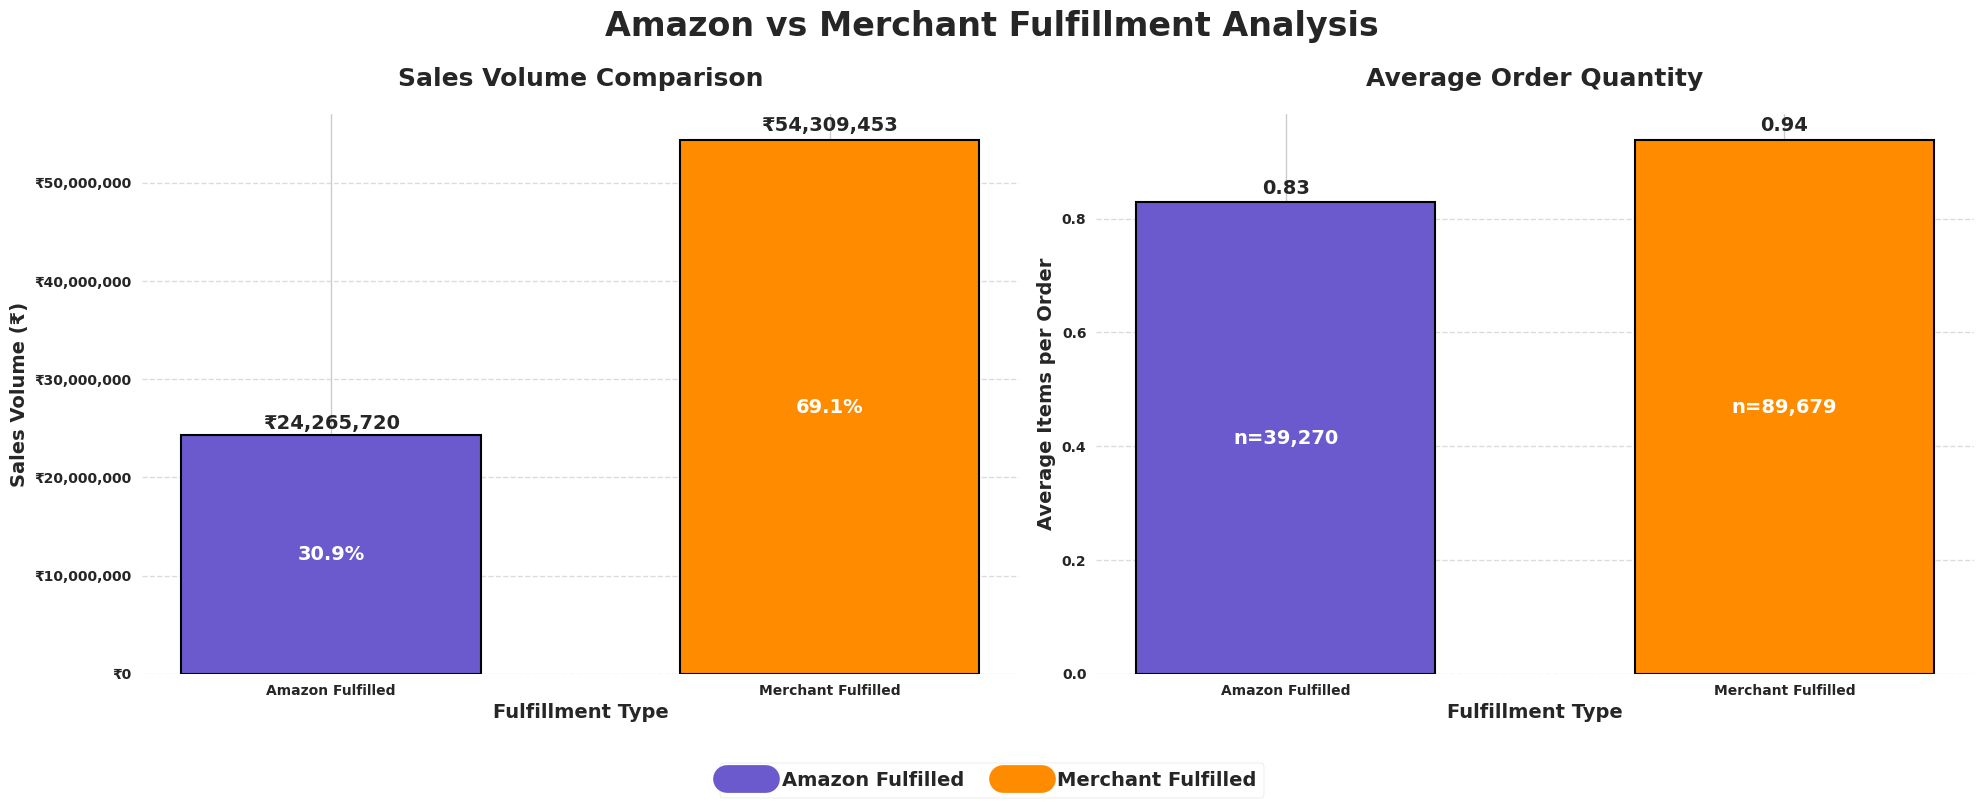


Sales Volume Summary:
Amazon Fulfilled: ₹24,265,719.94 (30.9%)
Merchant Fulfilled: ₹54,309,453.00 (69.1%)

Order Quantity Summary:
Amazon Average Order Quantity: 0.83 items (n=39,270 orders)
Merchant Average Order Quantity: 0.94 items (n=89,679 orders)


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualization
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'

# Load the dataset
file_path = '/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv'
df = pd.read_csv(file_path, low_memory=False)

# Map different identifiers for 'fulfilled-by'
df['fulfilled-by'] = df['fulfilled-by'].replace({
    'Easy Ship': 'Amazon',  # Hypothetical mapping
    # Add other potential mappings as needed
}).fillna('Merchant')  # Treat NaNs as 'Merchant'

# Segment data based on fulfillment
amazon_fulfilled = df[df['fulfilled-by'] == 'Amazon']
merchant_fulfilled = df[df['fulfilled-by'] == 'Merchant']

# Calculate metrics
amazon_fulfilled_sales_volume = amazon_fulfilled['Amount'].sum()
merchant_fulfilled_sales_volume = merchant_fulfilled['Amount'].sum()
amazon_avg_quantity = amazon_fulfilled['Qty'].mean()
merchant_avg_quantity = merchant_fulfilled['Qty'].mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Color palette
colors = ['#6A5ACD', '#FF8C00']  # SlateBlue and DarkOrange

# Plot 1: Sales Volume Comparison
bars1 = ax1.bar(['Amazon Fulfilled', 'Merchant Fulfilled'],
        [amazon_fulfilled_sales_volume, merchant_fulfilled_sales_volume],
        color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# Add data labels on top of each bar in Plot 1
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01*height,
             f'₹{height:,.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configure Plot 1
ax1.set_title('Sales Volume Comparison', fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Fulfillment Type', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sales Volume (₹)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))

# Calculate the total for percentage display
total_sales = amazon_fulfilled_sales_volume + merchant_fulfilled_sales_volume

# Add percentage annotations
ax1.text(0, amazon_fulfilled_sales_volume/2, 
         f"{amazon_fulfilled_sales_volume/total_sales:.1%}", 
         ha='center', va='center', fontsize=14, fontweight='bold', color='white')

ax1.text(1, merchant_fulfilled_sales_volume/2, 
         f"{merchant_fulfilled_sales_volume/total_sales:.1%}", 
         ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Plot 2: Average Order Quantity
bars2 = ax2.bar(['Amazon Fulfilled', 'Merchant Fulfilled'],
        [amazon_avg_quantity, merchant_avg_quantity],
        color=colors, width=0.6, edgecolor='black', linewidth=1.5)

# Add data labels on top of each bar in Plot 2
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01*height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Configure Plot 2
ax2.set_title('Average Order Quantity', fontsize=18, fontweight='bold', pad=20)
ax2.set_xlabel('Fulfillment Type', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Items per Order', fontsize=14, fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add count information
ax2.text(0, amazon_avg_quantity/2, 
         f"n={len(amazon_fulfilled):,}", 
         ha='center', va='center', fontsize=14, fontweight='bold', color='white')

ax2.text(1, merchant_avg_quantity/2, 
         f"n={len(merchant_fulfilled):,}", 
         ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Add a legend for both plots
custom_lines = [plt.Line2D([0], [0], color=colors[0], lw=20),
                plt.Line2D([0], [0], color=colors[1], lw=20)]
fig.legend(custom_lines, ['Amazon Fulfilled', 'Merchant Fulfilled'], 
           loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=2, fontsize=14, frameon=True)

# Add an overall title
fig.suptitle('Amazon vs Merchant Fulfillment Analysis', fontsize=24, fontweight='bold', y=0.98)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.85)

# Save the figure with high resolution
plt.savefig('fulfillment_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print summary
print(f"\nSales Volume Summary:")
print(f"Amazon Fulfilled: ₹{amazon_fulfilled_sales_volume:,.2f} ({amazon_fulfilled_sales_volume/total_sales:.1%})")
print(f"Merchant Fulfilled: ₹{merchant_fulfilled_sales_volume:,.2f} ({merchant_fulfilled_sales_volume/total_sales:.1%})")
print(f"\nOrder Quantity Summary:")
print(f"Amazon Average Order Quantity: {amazon_avg_quantity:.2f} items (n={len(amazon_fulfilled):,} orders)")
print(f"Merchant Average Order Quantity: {merchant_avg_quantity:.2f} items (n={len(merchant_fulfilled):,} orders)")

# PRODUCT MANAGEMENT& INVENTORYOPTIMIZATION

**1)Identifying high-demand productcategories.**

<ipython-input-19-2b07da80a3ca>:16: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-19-2b07da80a3ca>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


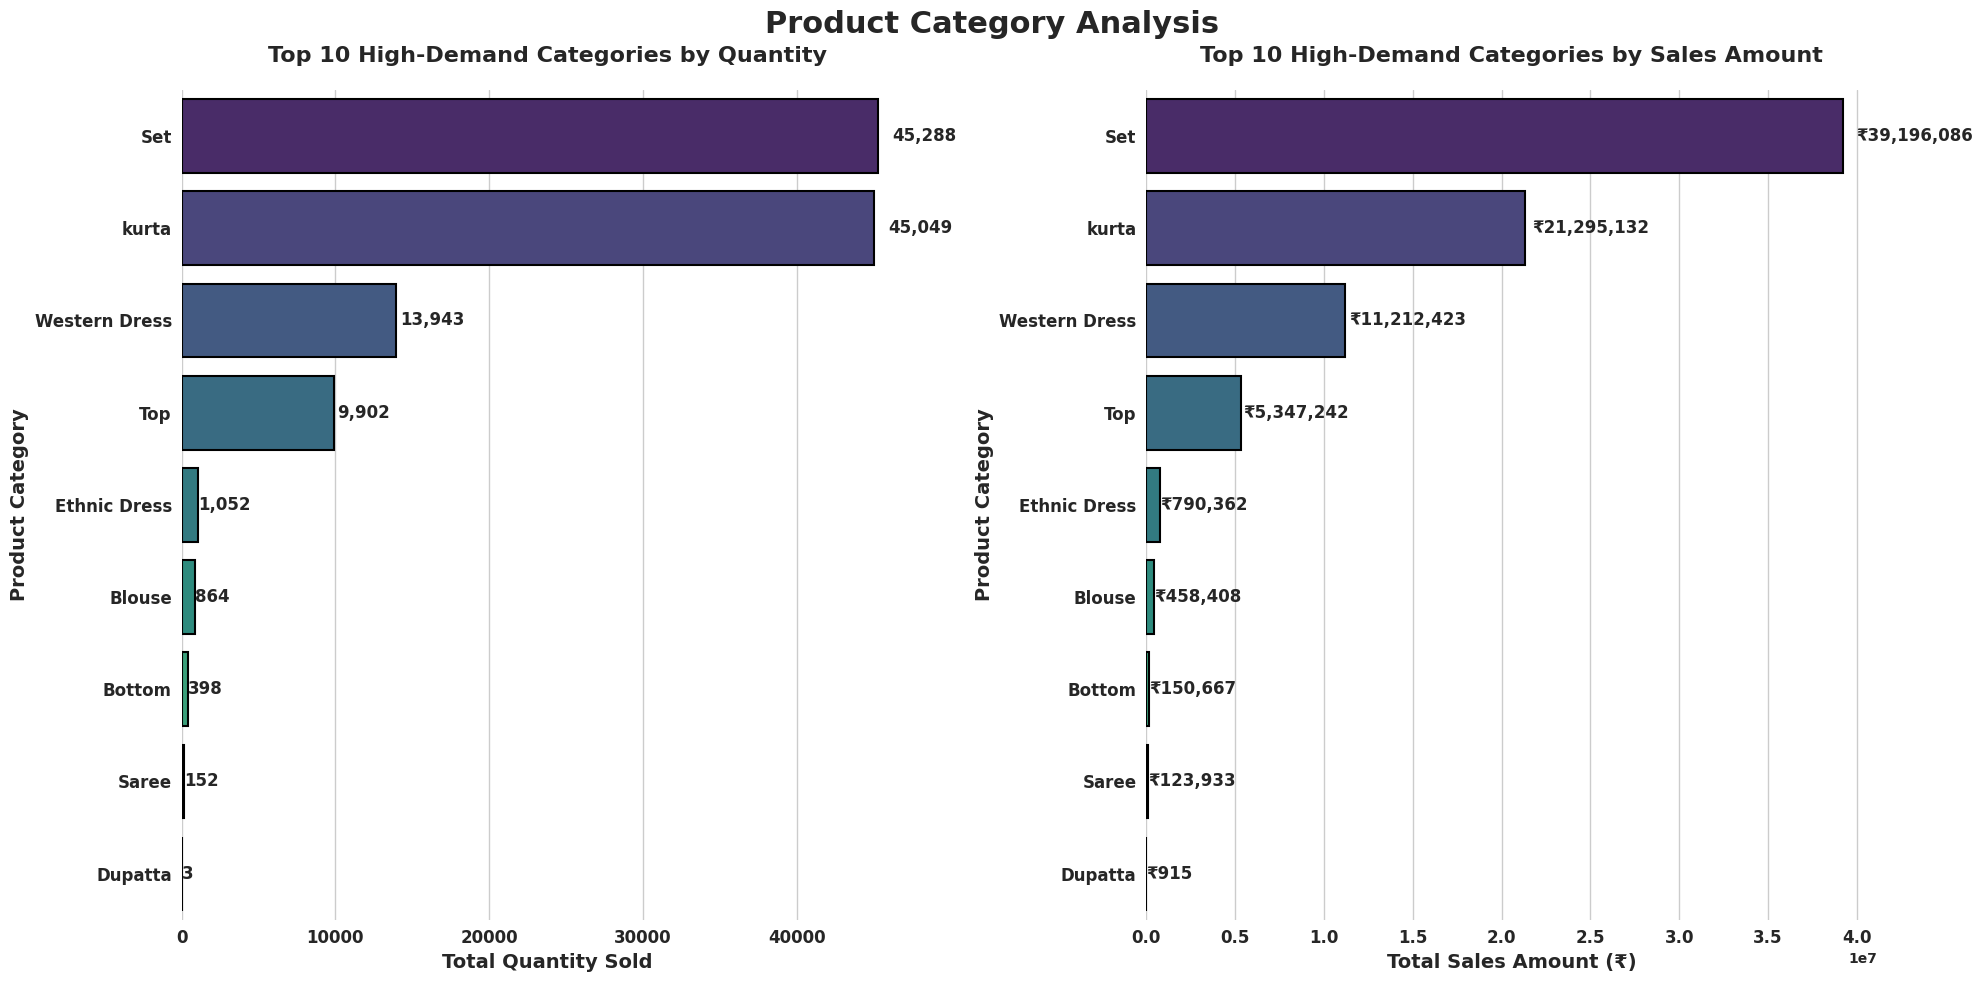

<Figure size 1500x800 with 0 Axes>

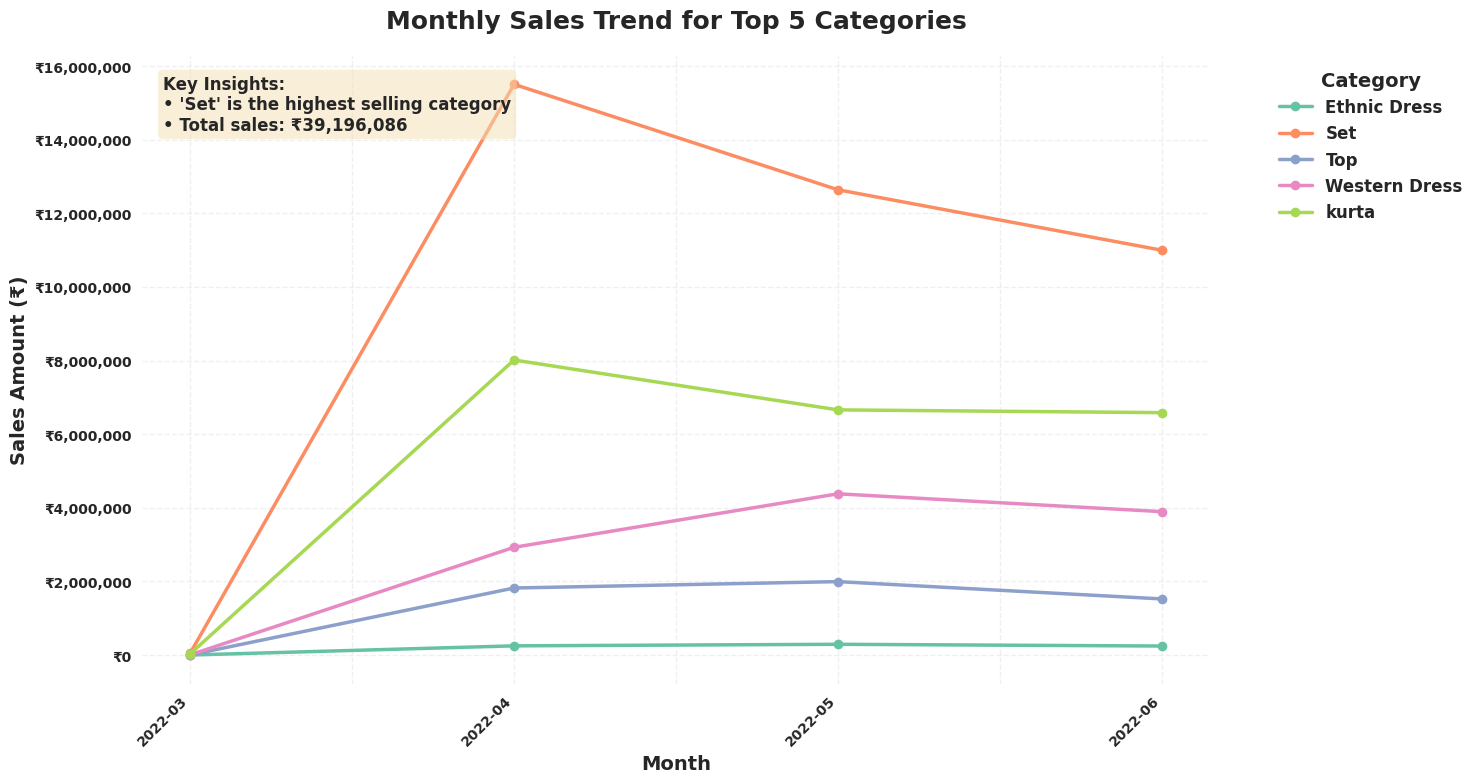


===== PRODUCT CATEGORY ANALYSIS SUMMARY =====

Top 5 Categories by Quantity Sold:
6. Set: 45,288 units
9. kurta: 45,049 units
8. Western Dress: 13,943 units
7. Top: 9,902 units
4. Ethnic Dress: 1,052 units

Top 5 Categories by Sales Amount:
6. Set: ₹39,196,086
9. kurta: ₹21,295,132
8. Western Dress: ₹11,212,423
7. Top: ₹5,347,242
4. Ethnic Dress: ₹790,362

The top 5 categories represent 99.1% of total sales


In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set overall style for better visualization
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# Step 1: Load the dataset
file_path = '/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv'
df = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Drop unnecessary columns (e.g., 'Unnamed: 22')
if 'Unnamed: 22' in df.columns:
    df = df.drop(columns=['Unnamed: 22'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Analyze Product Categories
# Group by 'Category' and sum the 'Qty' (quantity sold)
category_demand = df.groupby('Category')['Qty'].sum().reset_index()
category_demand = category_demand.sort_values(by='Qty', ascending=False)

# Group by 'Category' and sum the 'Amount' (total sales)
category_sales = df.groupby('Category')['Amount'].sum().reset_index()
category_sales = category_sales.sort_values(by='Amount', ascending=False)

# Step 4: Visualize the Results - Improved
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Create color palette
colors = sns.color_palette("viridis", n_colors=10)

# Plot 1: Top 10 categories by quantity sold
bars1 = sns.barplot(x='Qty', y='Category', data=category_demand.head(10), 
                   palette=colors, ax=ax1, edgecolor='black', linewidth=1.5)

# Add data labels to the first plot
for i, p in enumerate(ax1.patches):
    width = p.get_width()
    ax1.text(width + width*0.02, p.get_y() + p.get_height()/2, 
             f'{int(width):,}', ha='left', va='center', 
             fontsize=12, fontweight='bold')

# Configure the first plot
ax1.set_title('Top 10 High-Demand Categories by Quantity', fontsize=16, pad=20)
ax1.set_xlabel('Total Quantity Sold', fontsize=14)
ax1.set_ylabel('Product Category', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Top 10 categories by sales amount
bars2 = sns.barplot(x='Amount', y='Category', data=category_sales.head(10), 
                   palette=colors, ax=ax2, edgecolor='black', linewidth=1.5)

# Add data labels to the second plot
for i, p in enumerate(ax2.patches):
    width = p.get_width()
    ax2.text(width + width*0.02, p.get_y() + p.get_height()/2, 
             f'₹{int(width):,}', ha='left', va='center', 
             fontsize=12, fontweight='bold')

# Configure the second plot
ax2.set_title('Top 10 High-Demand Categories by Sales Amount', fontsize=16, pad=20)
ax2.set_xlabel('Total Sales Amount (₹)', fontsize=14)
ax2.set_ylabel('Product Category', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Add a common title to the figure
fig.suptitle('Product Category Analysis', fontsize=22, fontweight='bold', y=0.98)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save high-resolution image
plt.savefig('category_analysis.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

# Step 5: Improved Time Series Analysis for Top 5 Categories
plt.figure(figsize=(15, 8))

# Extract month and year
df['Month'] = df['Date'].dt.to_period('M')

# Get the top 5 categories by sales
top_categories = category_sales.head(5)['Category'].tolist()

# Filter data for top 5 categories
top_cat_df = df[df['Category'].isin(top_categories)]

# Group by month and category
monthly_category_sales = top_cat_df.groupby(['Month', 'Category'])['Amount'].sum().reset_index()

# Convert Period to string for plotting
monthly_category_sales['Month_Str'] = monthly_category_sales['Month'].astype(str)

# Pivot the data
pivot_df = monthly_category_sales.pivot(index='Month_Str', columns='Category', values='Amount')

# Plot with better styling
ax = pivot_df.plot(figsize=(15, 8), marker='o', linewidth=2.5, 
                   color=sns.color_palette("Set2", len(top_categories)))

# Add grid lines
plt.grid(True, alpha=0.3, linestyle='--')

# Enhance the plot
plt.title('Monthly Sales Trend for Top 5 Categories', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Sales Amount (₹)', fontsize=14, fontweight='bold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Format y-axis with rupee symbol
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x):,}'))

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a text box with insights
highest_category = category_sales.iloc[0]['Category']
highest_sales = category_sales.iloc[0]['Amount']
textstr = f"Key Insights:\n• '{highest_category}' is the highest selling category\n• Total sales: ₹{int(highest_sales):,}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.annotate(textstr, xy=(0.02, 0.97), xycoords='axes fraction', 
             fontsize=12, verticalalignment='top', bbox=props)

# Adjust layout
plt.tight_layout()

# Save high-resolution image
plt.savefig('category_trend_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print summary statistics
print("\n===== PRODUCT CATEGORY ANALYSIS SUMMARY =====")
print("\nTop 5 Categories by Quantity Sold:")
for i, row in category_demand.head(5).iterrows():
    print(f"{i+1}. {row['Category']}: {int(row['Qty']):,} units")

print("\nTop 5 Categories by Sales Amount:")
for i, row in category_sales.head(5).iterrows():
    print(f"{i+1}. {row['Category']}: ₹{int(row['Amount']):,}")

# Calculate percentage of total for top categories
total_sales = category_sales['Amount'].sum()
top5_sales = category_sales.head(5)['Amount'].sum()
print(f"\nThe top 5 categories represent {top5_sales/total_sales:.1%} of total sales")

2)Analyzing the average quantity orderedfor efficient stock management.

<ipython-input-20-5834fda9ef60>:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Missing values in each column:
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64


<ipython-input-20-5834fda9ef60>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


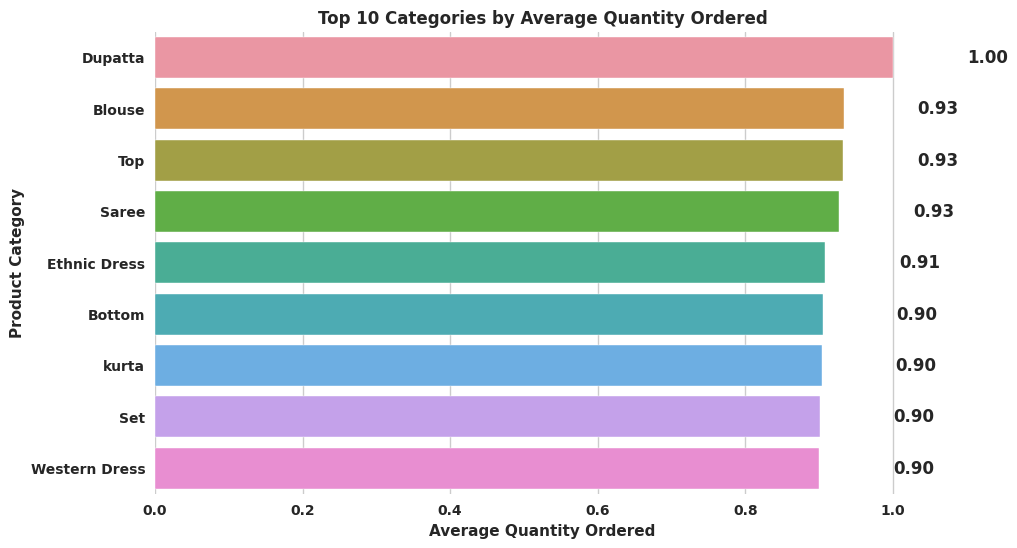

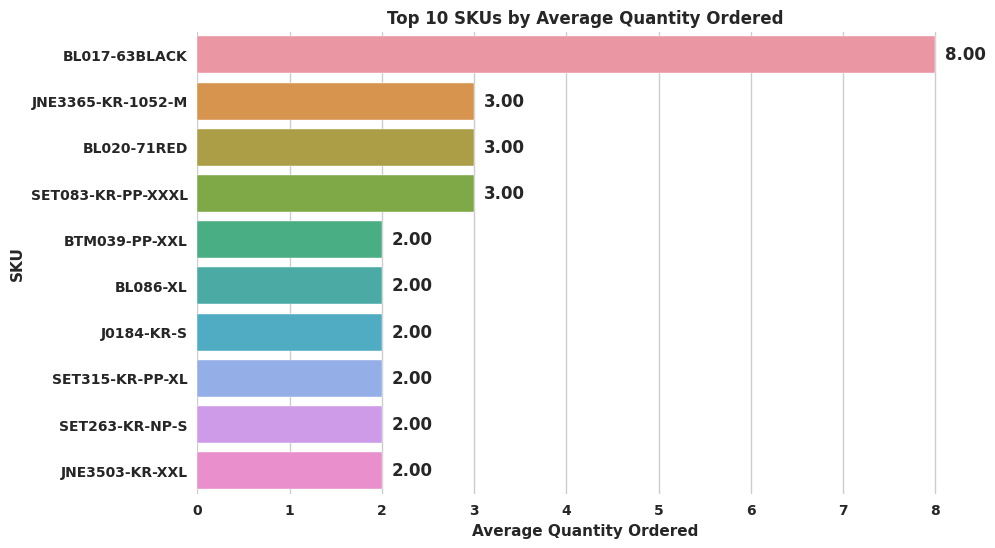

Top 5 Categories by Average Quantity Ordered:
       Category       Qty
2       Dupatta  1.000000
0        Blouse  0.933045
6           Top  0.932304
4         Saree  0.926829
3  Ethnic Dress  0.908463

Top 5 SKUs by Average Quantity Ordered:
                    SKU  Qty
58        BL017-63BLACK  8.0
2600  JNE3365-KR-1052-M  3.0
62          BL020-71RED  3.0
5688  SET083-KR-PP-XXXL  3.0
258       BTM039-PP-XXL  2.0


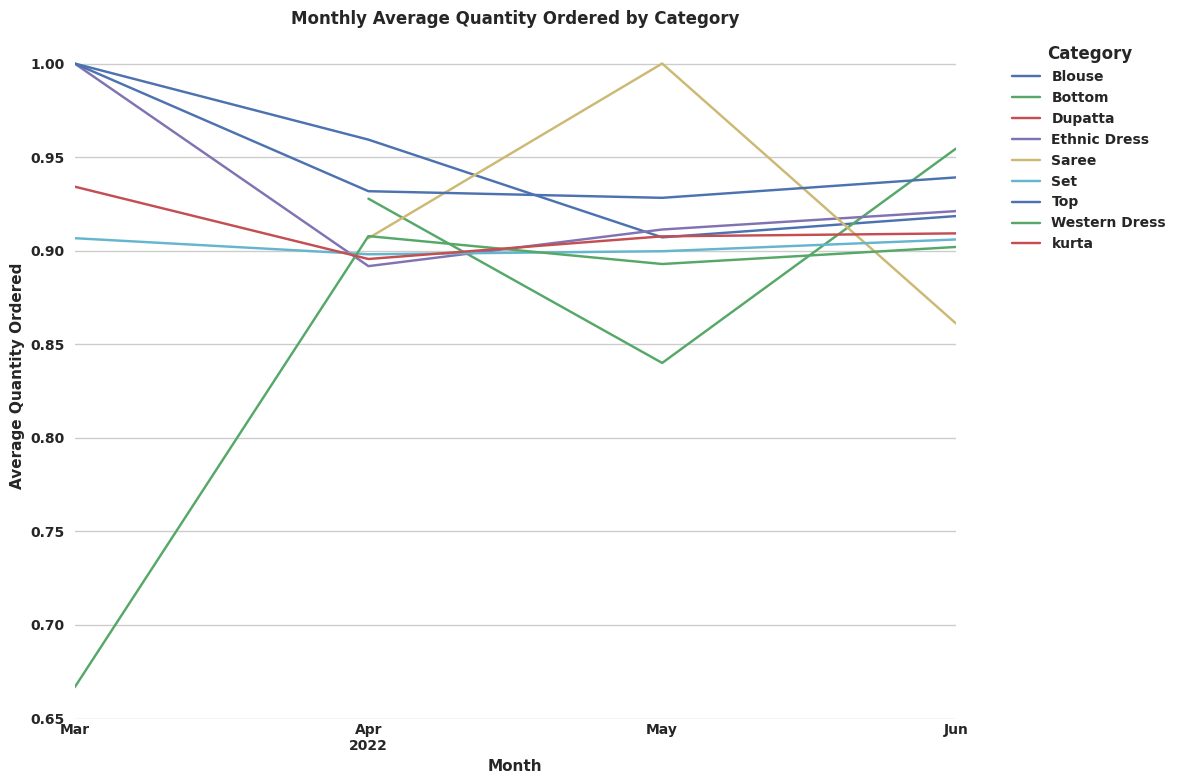

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = '/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv'
df = pd.read_csv(file_path)

# Step 2: Data Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop unnecessary columns (e.g., 'Unnamed: 22')
df = df.drop(columns=['Unnamed: 22'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Analyze Average Quantity Ordered
# Group by 'Category' and calculate the average quantity ordered
avg_qty_by_category = df.groupby('Category')['Qty'].mean().reset_index()
avg_qty_by_category = avg_qty_by_category.sort_values(by='Qty', ascending=False)

# Group by 'SKU' and calculate the average quantity ordered
avg_qty_by_sku = df.groupby('SKU')['Qty'].mean().reset_index()
avg_qty_by_sku = avg_qty_by_sku.sort_values(by='Qty', ascending=False)

# Step 4: Visualize the Results with Data Labels
# Plot the top 10 categories by average quantity ordered
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Qty', y='Category', data=avg_qty_by_category.head(10))
plt.title('Top 10 Categories by Average Quantity Ordered')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('Product Category')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()

# Plot the top 10 SKUs by average quantity ordered
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Qty', y='SKU', data=avg_qty_by_sku.head(10))
plt.title('Top 10 SKUs by Average Quantity Ordered')
plt.xlabel('Average Quantity Ordered')
plt.ylabel('SKU')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()

# Step 5: Identify Key Insights
# Print the top 5 categories by average quantity ordered
print("Top 5 Categories by Average Quantity Ordered:")
print(avg_qty_by_category.head(5))

# Print the top 5 SKUs by average quantity ordered
print("\nTop 5 SKUs by Average Quantity Ordered:")
print(avg_qty_by_sku.head(5))

# Step 6: Further Analysis (Optional)
# Time Series Analysis: Monthly average quantity ordered
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_qty = df.groupby(['Month', 'Category'])['Qty'].mean().reset_index()

# Pivot the data for easier plotting
pivot_df = monthly_avg_qty.pivot(index='Month', columns='Category', values='Qty')

# Plot the time series
pivot_df.plot(figsize=(12, 8))
plt.title('Monthly Average Quantity Ordered by Category')
plt.xlabel('Month')
plt.ylabel('Average Quantity Ordered')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**3)Enhancing inventory control to preventstockouts or overstocking.**

<ipython-input-21-cb14035c8841>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


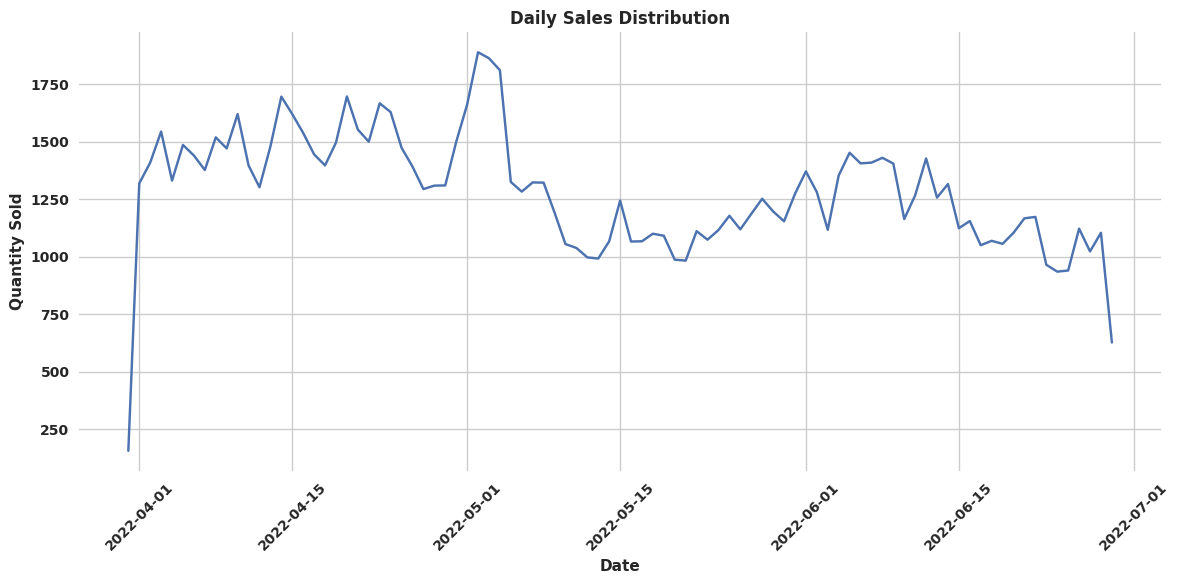

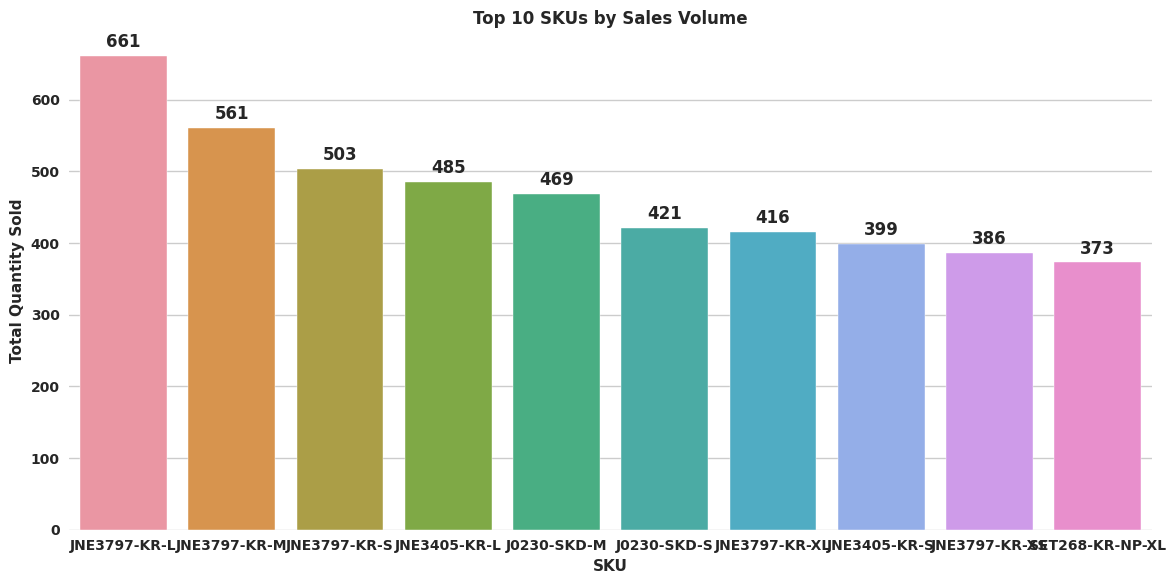

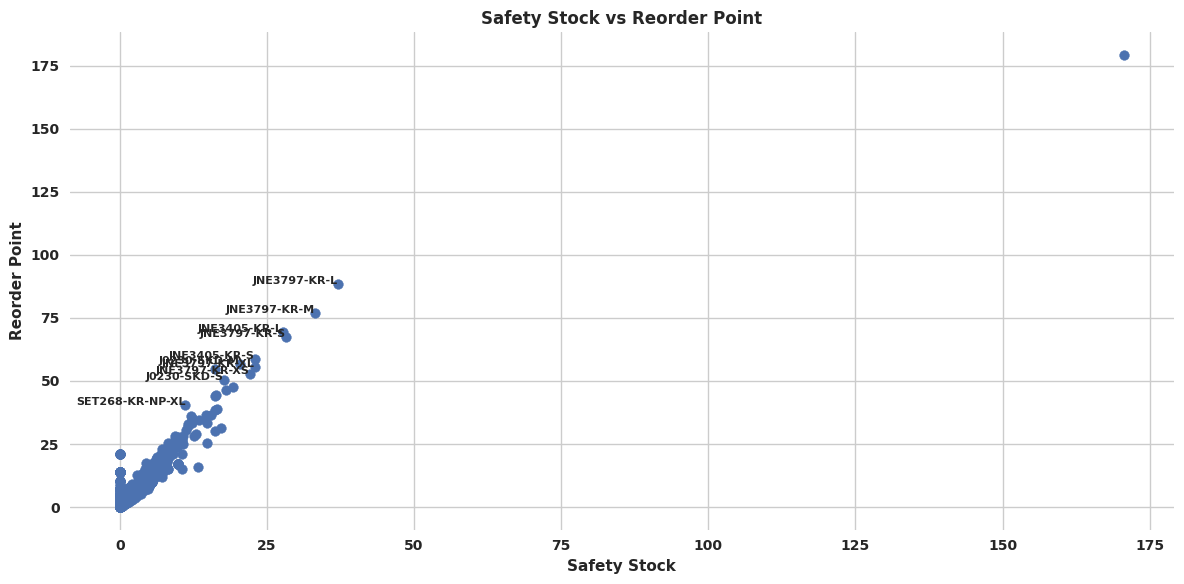


Inventory Control Analysis Summary

Key Metrics:
Total SKUs: 7195
Average Daily Demand across all SKUs: inf units
Average Safety Stock Level: inf units

Inventory Control Recommendations:

High Variability SKUs (143 SKUs)
Recommended Action: Increase safety stock and monitor closely

Low Turnover SKUs (1555 SKUs)
Recommended Action: Consider reducing stock levels or discontinuing


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Read the dataset
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv', low_memory=False)

def analyze_inventory():
    # Convert date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Group by SKU and calculate key metrics
    sku_analysis = df.groupby('SKU').agg({
        'Qty': ['count', 'sum', 'mean', 'std'],
        'Date': ['min', 'max']
    }).round(2)
    
    # Flatten column names
    sku_analysis.columns = ['Order_Count', 'Total_Quantity', 'Avg_Quantity', 'Std_Dev', 'First_Order', 'Last_Order']
    
    # Calculate days between first and last order
    sku_analysis['Days_Active'] = (sku_analysis['Last_Order'] - sku_analysis['First_Order']).dt.days
    
    # Calculate daily demand rate
    sku_analysis['Daily_Demand'] = sku_analysis['Total_Quantity'] / sku_analysis['Days_Active']
    
    # Calculate safety stock (using 2 standard deviations for 95% confidence)
    sku_analysis['Safety_Stock'] = (sku_analysis['Daily_Demand'] * 7) * (sku_analysis['Std_Dev'] * 2)
    
    # Calculate reorder point (7 days lead time assumed)
    sku_analysis['Reorder_Point'] = (sku_analysis['Daily_Demand'] * 7) + sku_analysis['Safety_Stock']
    
    # Calculate optimal order quantity (EOQ)
    holding_cost = 0.2  # 20% of item value
    ordering_cost = 50  # $50 per order
    sku_analysis['EOQ'] = ((2 * ordering_cost * sku_analysis['Total_Quantity']) / holding_cost) ** 0.5
    
    return sku_analysis

def identify_risk_items(sku_analysis):
    # Define risk categories
    high_risk = sku_analysis[sku_analysis['Std_Dev'] > sku_analysis['Avg_Quantity']]
    low_turnover = sku_analysis[sku_analysis['Daily_Demand'] < 0.1]  # Less than 1 unit per 10 days
    high_value = sku_analysis[sku_analysis['Total_Quantity'] * sku_analysis['Avg_Quantity'] > 10000]
    
    return {
        'high_risk': high_risk,
        'low_turnover': low_turnover,
        'high_value': high_value
    }

def plot_inventory_insights(df, sku_analysis):
    # 1. Daily Sales Distribution
    plt.figure(figsize=(12, 6))
    daily_sales = df.groupby('Date')['Qty'].sum()
    plt.plot(daily_sales.index, daily_sales.values)
    plt.title('Daily Sales Distribution')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Top 10 SKUs by Volume
    plt.figure(figsize=(12, 6))
    top_skus = sku_analysis.nlargest(10, 'Total_Quantity')
    ax = sns.barplot(x=top_skus.index, y=top_skus['Total_Quantity'])
    plt.title('Top 10 SKUs by Sales Volume')
    plt.xlabel('SKU')
    plt.ylabel('Total Quantity Sold')
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()
    
    # 3. Safety Stock vs Reorder Point
    plt.figure(figsize=(12, 6))
    plt.scatter(sku_analysis['Safety_Stock'], sku_analysis['Reorder_Point'])
    plt.title('Safety Stock vs Reorder Point')
    plt.xlabel('Safety Stock')
    plt.ylabel('Reorder Point')
    
    # Add data labels for top 10 SKUs by Total_Quantity
    top_skus = sku_analysis.nlargest(10, 'Total_Quantity')
    for i, row in top_skus.iterrows():
        plt.text(row['Safety_Stock'], row['Reorder_Point'], i, fontsize=8, ha='right')
    
    plt.tight_layout()
    plt.show()

def generate_recommendations(sku_analysis, risk_items):
    recommendations = []
    
    # High-risk SKUs
    if len(risk_items['high_risk']) > 0:
        recommendations.append({
            'category': 'High Variability SKUs',
            'count': len(risk_items['high_risk']),
            'action': 'Increase safety stock and monitor closely'
        })
    
    # Low-turnover SKUs
    if len(risk_items['low_turnover']) > 0:
        recommendations.append({
            'category': 'Low Turnover SKUs',
            'count': len(risk_items['low_turnover']),
            'action': 'Consider reducing stock levels or discontinuing'
        })
    
    # High-value SKUs
    if len(risk_items['high_value']) > 0:
        recommendations.append({
            'category': 'High Value SKUs',
            'count': len(risk_items['high_value']),
            'action': 'Implement JIT inventory and careful monitoring'
        })
    
    return recommendations

def main():
    # Perform analysis
    sku_analysis = analyze_inventory()
    risk_items = identify_risk_items(sku_analysis)
    
    # Generate visualizations
    plot_inventory_insights(df, sku_analysis)
    
    # Generate recommendations
    recommendations = generate_recommendations(sku_analysis, risk_items)
    
    # Print summary
    print("\nInventory Control Analysis Summary")
    print("=================================")
    
    print("\nKey Metrics:")
    print(f"Total SKUs: {len(sku_analysis)}")
    print(f"Average Daily Demand across all SKUs: {sku_analysis['Daily_Demand'].mean():.2f} units")
    print(f"Average Safety Stock Level: {sku_analysis['Safety_Stock'].mean():.2f} units")
    
    print("\nInventory Control Recommendations:")
    for rec in recommendations:
        print(f"\n{rec['category']} ({rec['count']} SKUs)")
        print(f"Recommended Action: {rec['action']}")
    
    # Export detailed analysis to CSV
    sku_analysis.to_csv('inventory_analysis.csv')

if __name__ == "__main__":
    main()

# CUSTOMERSATISFACTION& RETURNS

**1)Investigating high return and cancellationrates.**

<ipython-input-22-9061c2bd494b>:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')  # Replace with your file path
<ipython-input-22-9061c2bd494b>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Missing values in each column:
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6871
Qty                       0
currency               7794
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49142
B2B                       0
fulfilled-by          89679
Unnamed: 22           49041
dtype: int64
Return Rate: 1.63%
Cancellation Rate: 14.22%


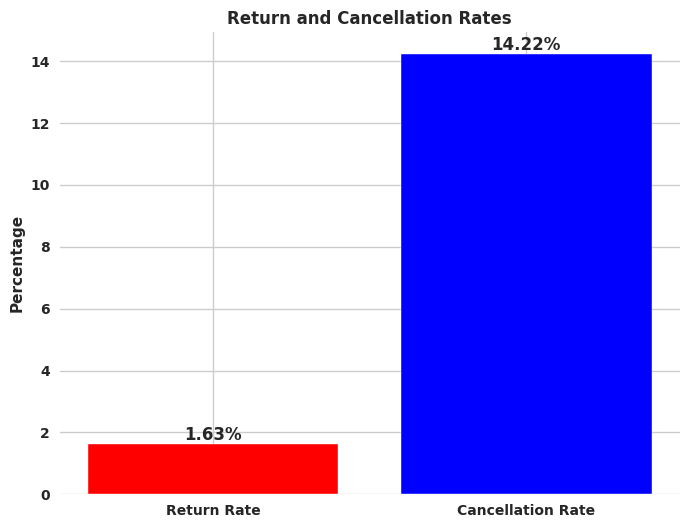

Categories with Highest Return/Cancellation Rates:
        Category  Return_Cancellation_Rate
5            Set                 16.264545
8          kurta                 16.060722
7  Western Dress                 15.921265
1         Bottom                 15.000000
3   Ethnic Dress                 13.989637
0         Blouse                 13.822894
4          Saree                 13.414634
6            Top                 13.256755
2        Dupatta                  0.000000


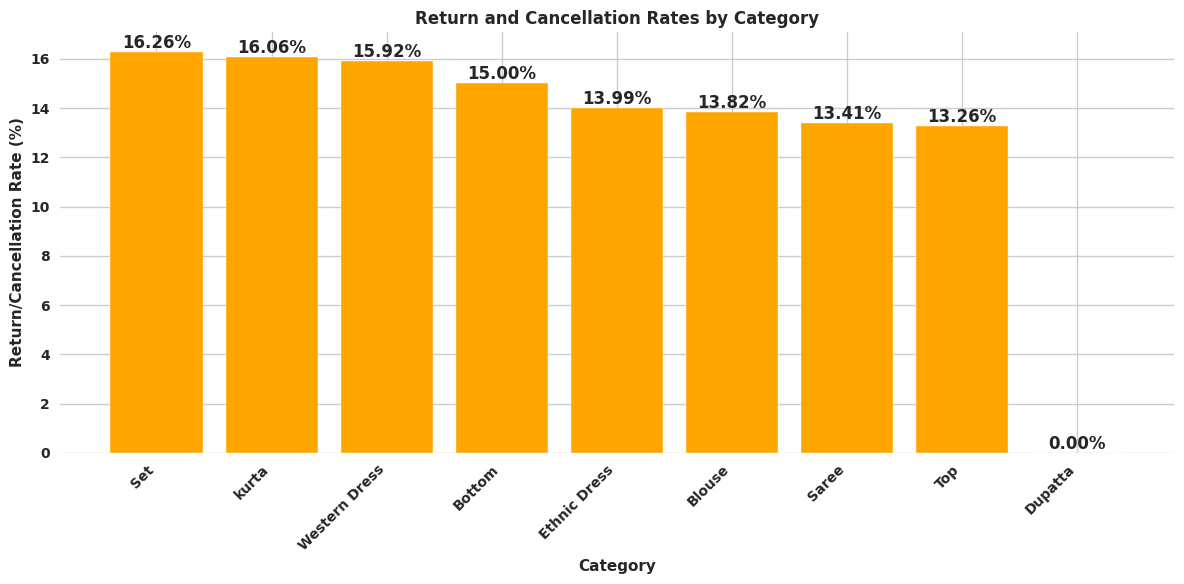

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')  # Replace with your file path

# Step 2: Data cleaning
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Amount' is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 3: Analyze return and cancellation rates
# Filter for returns and cancellations
returned_orders = df[df['Status'].str.lower().str.contains('return')]
cancelled_orders = df[df['Status'].str.lower().str.contains('cancel')]

# Calculate rates
total_orders = len(df)
return_rate = len(returned_orders) / total_orders * 100
cancellation_rate = len(cancelled_orders) / total_orders * 100

print(f"Return Rate: {return_rate:.2f}%")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Step 4: Visualize the results with data labels
# Plot return and cancellation rates
plt.figure(figsize=(8, 6))
bars = plt.bar(['Return Rate', 'Cancellation Rate'], [return_rate, cancellation_rate], color=['red', 'blue'])
plt.ylabel('Percentage')
plt.title('Return and Cancellation Rates')

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Step 5: Identify potential causes
# Group by category to see which categories have the highest return/cancellation rates
category_analysis = df.groupby('Category')['Status'].apply(
    lambda x: ((x.str.lower().str.contains('return').sum() + 
                x.str.lower().str.contains('cancel').sum()) / len(x)) * 100
).reset_index(name='Return_Cancellation_Rate')

# Sort by highest return/cancellation rate
category_analysis = category_analysis.sort_values(by='Return_Cancellation_Rate', ascending=False)

print("Categories with Highest Return/Cancellation Rates:")
print(category_analysis)

# Step 6: Visualize category-wise return/cancellation rates
plt.figure(figsize=(12, 6))
bars = plt.bar(category_analysis['Category'], category_analysis['Return_Cancellation_Rate'], color='orange')
plt.xlabel('Category')
plt.ylabel('Return/Cancellation Rate (%)')
plt.title('Return and Cancellation Rates by Category')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**2)Identifying problematic products/categories to enhance quality.**

<ipython-input-23-04a038510187>:6: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')


              Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   
2  404-0687676-7273146  04-30-22                       Shipped     Amazon   
3  403-9615377-8133951  04-30-22                     Cancelled   Merchant   
4  407-1069790-7240320  04-30-22                       Shipped     Amazon   

  Sales Channel  ship-service-level    Style              SKU       Category  \
0      Amazon.in           Standard   SET389   SET389-KR-NP-S            Set   
1      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL          kurta   
2      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL          kurta   
3      Amazon.in           Standard    J0341       J0341-DR-L  Western Dress   
4      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL            Top   

  Size  ... currency  Amount    ship-city   ship-state  

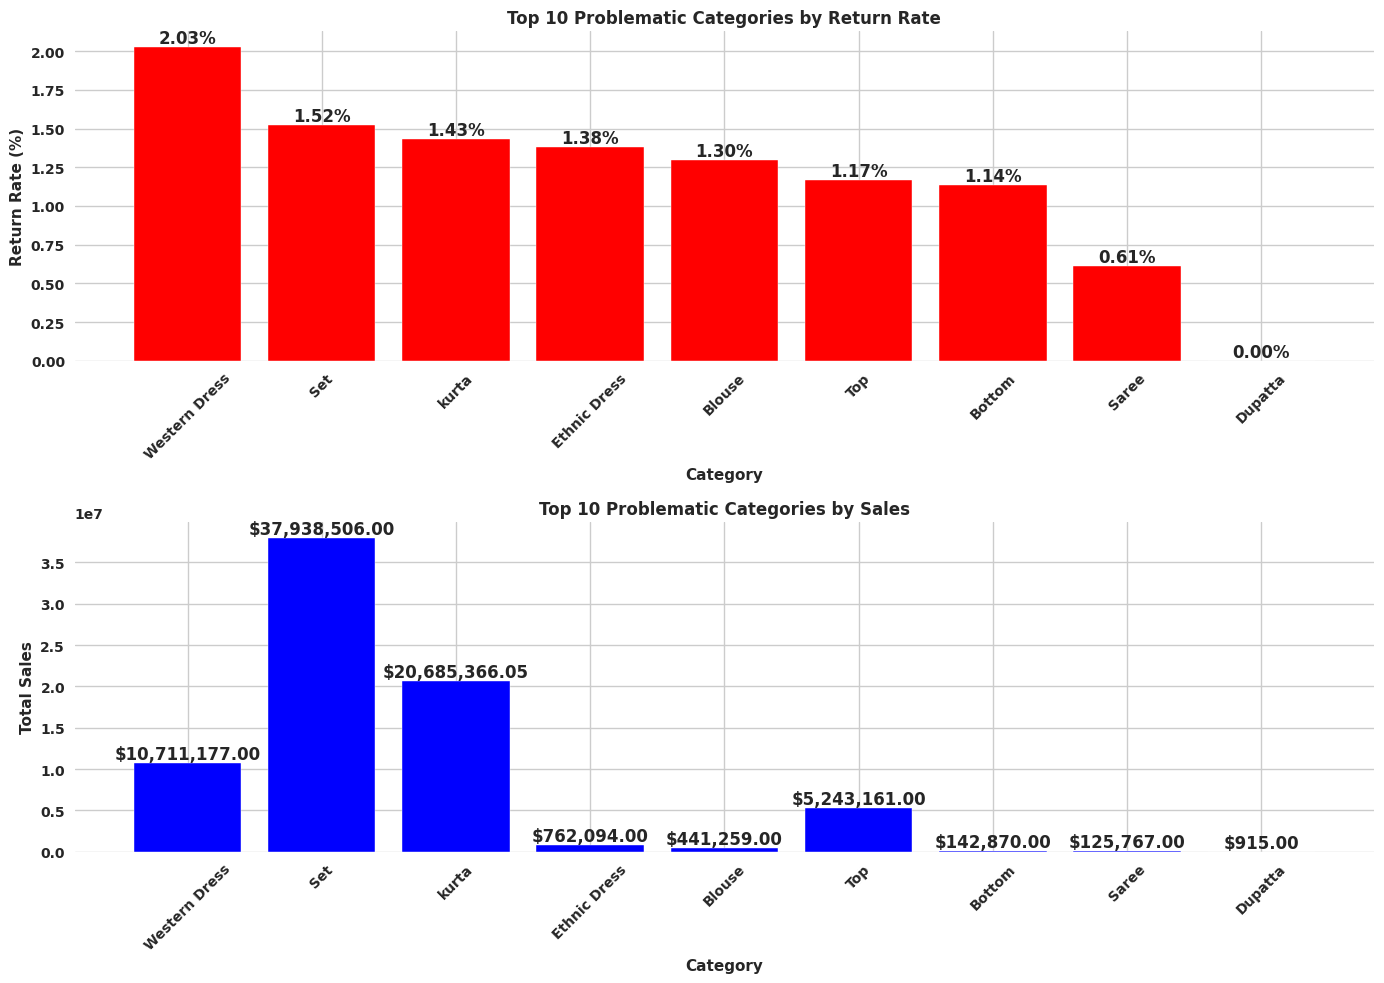

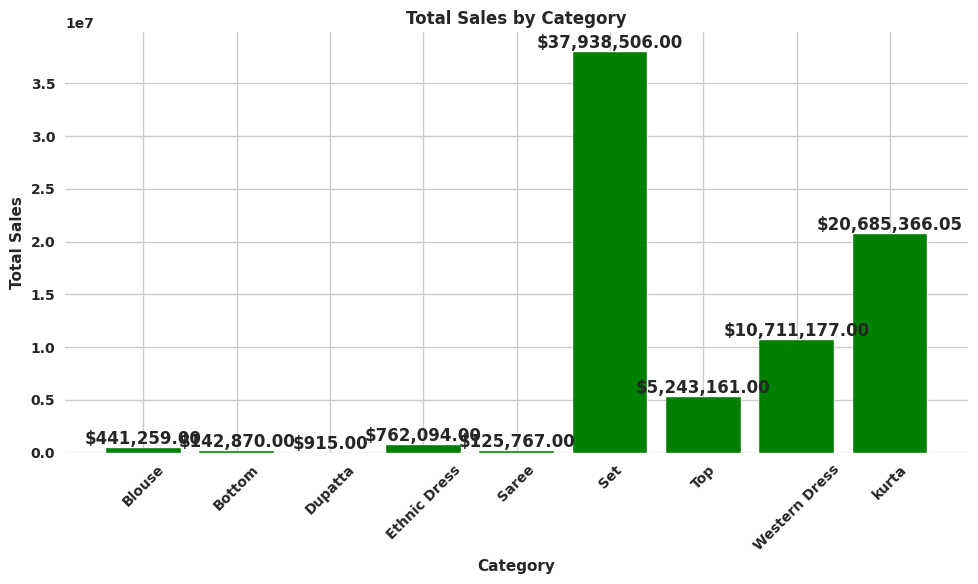

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Step 2: Clean the data (If necessary)
# If 'Status' column contains 'Returned' for products that were returned, create a new column for 'Returned'
df['Returned'] = df['Status'].apply(lambda x: 1 if 'Returned' in str(x) else 0)

# Step 3: Calculate return rate and total sales per category
# Calculate the return rate per category
return_rate_per_category = df.groupby('Category')['Returned'].mean().reset_index()
return_rate_per_category['Return Rate'] = return_rate_per_category['Returned'] * 100  # Return rate in percentage

# Calculate total sales per category
df['Sales'] = df['Qty'] * df['Amount']  # Total sales for each transaction
sales_per_category = df.groupby('Category')['Sales'].sum().reset_index()

# Step 4: Merge return rate and sales data
category_performance = pd.merge(return_rate_per_category, sales_per_category, on='Category')

# Step 5: Sort categories by highest return rate and lowest sales to identify problematic categories
problematic_categories = category_performance.sort_values(by=['Return Rate', 'Sales'], ascending=[False, True])

# Step 6: Show top 10 problematic categories (high return rate, low sales)
print(problematic_categories.head(10))

# Step 7: Visualize the top 10 problematic categories with data labels

# Create a figure for two subplots
plt.figure(figsize=(14, 10))

# Plot for Return Rate
plt.subplot(2, 1, 1)
bars_return = plt.bar(problematic_categories['Category'][:10], problematic_categories['Return Rate'][:10], color='red')
plt.title('Top 10 Problematic Categories by Return Rate')
plt.xlabel('Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)

# Add data labels for Return Rate
for bar in bars_return:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

# Plot for Sales
plt.subplot(2, 1, 2)
bars_sales = plt.bar(problematic_categories['Category'][:10], problematic_categories['Sales'][:10], color='blue')
plt.title('Top 10 Problematic Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add data labels for Sales
for bar in bars_sales:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 8: Analyze total sales and return rates by category to find trends
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Visualize sales by category with data labels
plt.figure(figsize=(10, 6))
bars_sales_all = plt.bar(category_sales['Category'], category_sales['Sales'], color='green')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add data labels for Total Sales
for bar in bars_sales_all:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 9: Suggest Quality Enhancements

# For categories with high return rates:
# Investigate customer feedback and improve product quality control.

# For categories with low sales:
# - Improve marketing for low-sales categories.
# - Evaluate pricing strategy (possibly offer discounts or promotions).
# - Enhance visibility and description of these categories.

# Example of writing the problematic categories to a new CSV for further analysis
problematic_categories.to_csv('/kaggle/working/problematic_categories.csv', index=False)

# Optional: If you want to save the cleaned data for future use
df.to_csv('/kaggle/working/cleaned_sales_dataset.csv', index=False)

<ipython-input-24-788507bc1423>:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')


Product Category Quality Analysis Report

Top 5 Most Problematic Categories:

Western Dress:
- Problem Rate: 51.77%
- Total Orders: 15495
- Value at Risk: $5,804,671.74

Bottom:
- Problem Rate: 49.55%
- Total Orders: 440
- Value at Risk: $74,655.98

Set:
- Problem Rate: 39.03%
- Total Orders: 50275
- Value at Risk: $15,298,232.63

kurta:
- Problem Rate: 38.27%
- Total Orders: 49867
- Value at Risk: $8,149,647.28

Ethnic Dress:
- Problem Rate: 34.97%
- Total Orders: 1158
- Value at Risk: $276,389.82



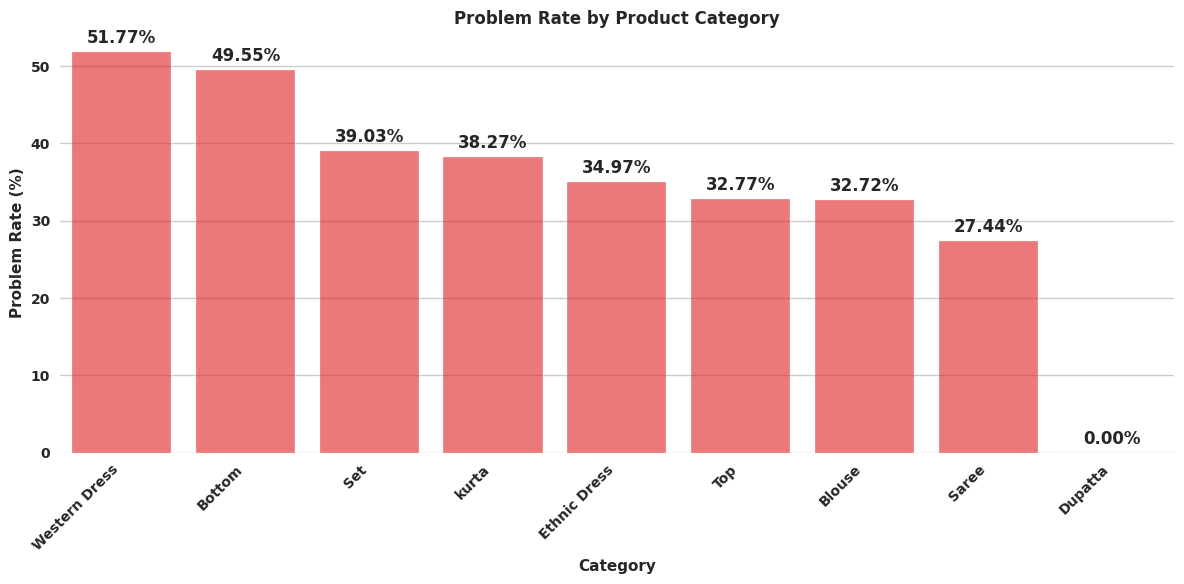

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_product_quality():
    # Read the dataset
    df = pd.read_csv('/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv')
    
    # Calculate problem metrics by category
    category_analysis = pd.DataFrame({
        'Total_Orders': df.groupby('Category')['Order ID'].count(),
        'Problematic_Orders': df.groupby('Category')['Status'].apply(
            lambda x: x[~x.isin(['Delivered', 'Shipped', 'In Transit'])].count()
        ),
        'Total_Value': df.groupby('Category')['Amount'].sum()
    }).reset_index()
    
    # Calculate percentage of problematic orders
    category_analysis['Problem_Rate'] = (
        category_analysis['Problematic_Orders'] / category_analysis['Total_Orders'] * 100
    ).round(2)
    
    # Calculate value at risk
    category_analysis['Value_at_Risk'] = (
        category_analysis['Problem_Rate'] * category_analysis['Total_Value'] / 100
    ).round(2)
    
    # Sort by problem rate descending
    category_analysis = category_analysis.sort_values('Problem_Rate', ascending=False)
    
    # Create detailed status breakdown
    status_breakdown = pd.crosstab(df['Category'], df['Status'], normalize='index') * 100
    
    # Analyze fulfillment issues
    fulfillment_issues = pd.crosstab(
        df['Category'], 
        df['Fulfilment'],
        values=df['Amount'],
        aggfunc='sum'
    ).fillna(0)
    
    return {
        'category_analysis': category_analysis,
        'status_breakdown': status_breakdown,
        'fulfillment_issues': fulfillment_issues
    }

def visualize_problems(category_analysis):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=category_analysis,
        x='Category',
        y='Problem_Rate',
        color='red',
        alpha=0.6
    )
    plt.xticks(rotation=45, ha='right')
    plt.title('Problem Rate by Product Category')
    plt.ylabel('Problem Rate (%)')
    
    # Add data labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    
    plt.tight_layout()
    return plt

def generate_report(analysis_results):
    category_analysis = analysis_results['category_analysis']
    
    report = "Product Category Quality Analysis Report\n"
    report += "=" * 40 + "\n\n"
    
    # Top problematic categories
    report += "Top 5 Most Problematic Categories:\n"
    for _, row in category_analysis.head().iterrows():
        report += f"\n{row['Category']}:\n"
        report += f"- Problem Rate: {row['Problem_Rate']}%\n"
        report += f"- Total Orders: {row['Total_Orders']}\n"
        report += f"- Value at Risk: ${row['Value_at_Risk']:,.2f}\n"
    
    return report

# Main execution
def main():
    # Perform analysis
    analysis_results = analyze_product_quality()
    
    # Generate visualization
    plt = visualize_problems(analysis_results['category_analysis'])
    
    # Generate report
    report = generate_report(analysis_results)
    
    return analysis_results, plt, report

if __name__ == "__main__":
    results, plot, report = main()
    print(report)
    plot.show()

**3)Improving customer experience throughbetter service policies**

Loading data...

Unique Status values: ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']
Analyzing service metrics...

Using 'Shipped' as the successful status
Creating visualizations...
Generating recommendations...

Service Policy Improvement Recommendations:

Service Level Recommendations:
- Best performing: Expedited (86.6% success rate)
- Needs improvement: Standard (2.5% success rate)
- Consider reallocating resources to improve Standard performance

Fulfillment Recommendations:
- Most effective method: Amazon
- Consider expanding Amazon capacity
- Review processes for other fulfillment methods

Order Status Insights:
- Current success rate: 60.3%
- Focus on converting other statuses to 'Shipped'
- Implement proactive order tracki

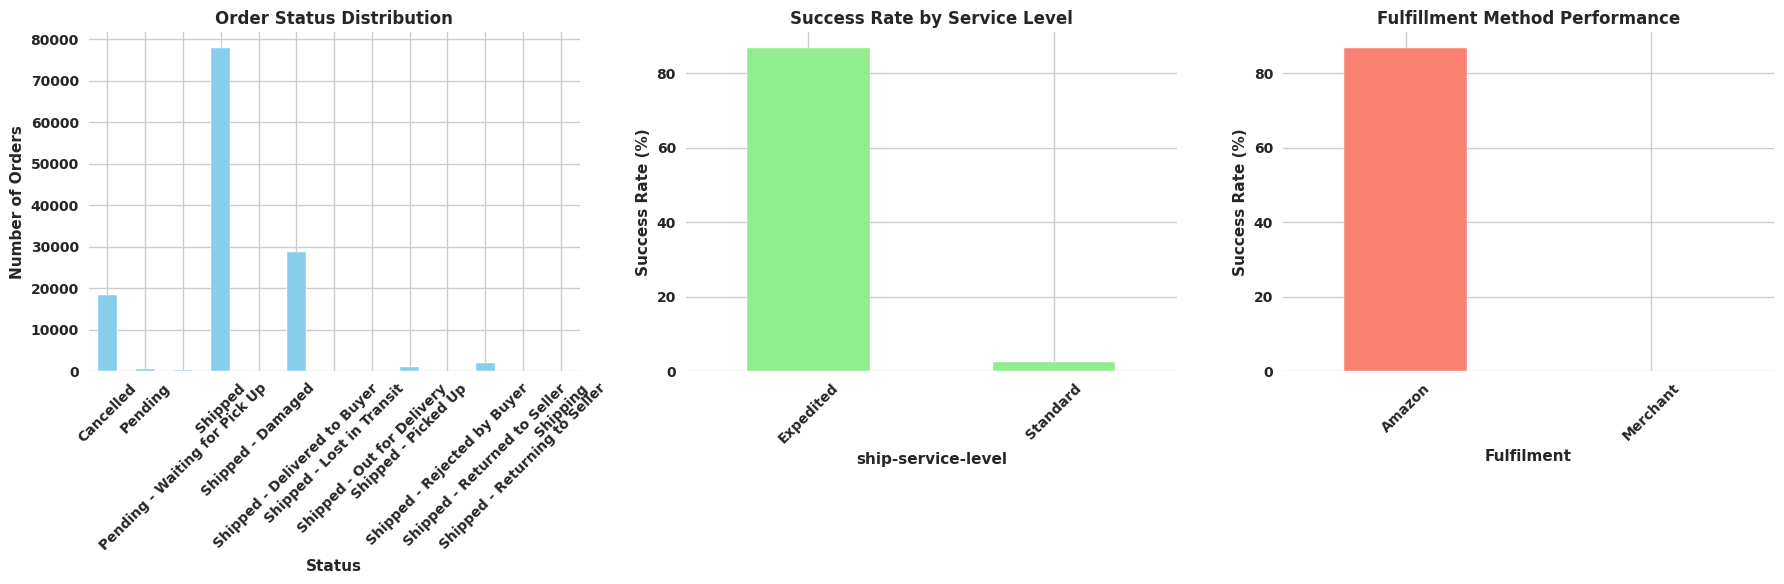

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    # Read data with proper settings
    df = pd.read_csv(file_path, low_memory=False)
    
    # Print unique status values for verification
    print("\nUnique Status values:", df['Status'].unique())
    
    return df

def analyze_service_metrics(df):
    # Get the most common (successful) status
    successful_status = df['Status'].mode()[0]
    print(f"\nUsing '{successful_status}' as the successful status")
    
    # 1. Order Status Analysis
    status_metrics = pd.DataFrame({
        'Total_Orders': df.groupby('Status')['Order ID'].count(),
        'Average_Value': df.groupby('Status')['Amount'].mean()
    }).round(2)
    
    # 2. Service Level Performance
    service_metrics = pd.DataFrame({
        'Total_Orders': df.groupby('ship-service-level')['Order ID'].count(),
        'Success_Rate': df.groupby('ship-service-level')['Status'].apply(
            lambda x: (x == successful_status).mean() * 100
        ),
        'Average_Value': df.groupby('ship-service-level')['Amount'].mean()
    }).round(2)
    
    # 3. Fulfillment Analysis
    fulfillment_metrics = pd.DataFrame({
        'Total_Orders': df.groupby('Fulfilment')['Order ID'].count(),
        'Success_Rate': df.groupby('Fulfilment')['Status'].apply(
            lambda x: (x == successful_status).mean() * 100
        ),
        'Average_Value': df.groupby('Fulfilment')['Amount'].mean()
    }).round(2)
    
    return {
        'status': status_metrics,
        'service': service_metrics,
        'fulfillment': fulfillment_metrics,
        'successful_status': successful_status
    }

def create_visualizations(metrics):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Order Status Distribution
    metrics['status']['Total_Orders'].plot(
        kind='bar',
        ax=ax1,
        color='skyblue'
    )
    ax1.set_title('Order Status Distribution')
    ax1.set_ylabel('Number of Orders')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Service Level Success Rates
    metrics['service']['Success_Rate'].plot(
        kind='bar',
        ax=ax2,
        color='lightgreen'
    )
    ax2.set_title('Success Rate by Service Level')
    ax2.set_ylabel('Success Rate (%)')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Fulfillment Performance
    metrics['fulfillment']['Success_Rate'].plot(
        kind='bar',
        ax=ax3,
        color='salmon'
    )
    ax3.set_title('Fulfillment Method Performance')
    ax3.set_ylabel('Success Rate (%)')
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    return fig

def generate_recommendations(metrics):
    successful_status = metrics['successful_status']
    recommendations = []
    
    # 1. Service Level Recommendations
    best_service = metrics['service']['Success_Rate'].idxmax()
    worst_service = metrics['service']['Success_Rate'].idxmin()
    recommendations.append(
        f"Service Level Recommendations:\n"
        f"- Best performing: {best_service} ({metrics['service'].loc[best_service, 'Success_Rate']:.1f}% success rate)\n"
        f"- Needs improvement: {worst_service} ({metrics['service'].loc[worst_service, 'Success_Rate']:.1f}% success rate)\n"
        f"- Consider reallocating resources to improve {worst_service} performance"
    )
    
    # 2. Fulfillment Recommendations
    best_fulfillment = metrics['fulfillment']['Success_Rate'].idxmax()
    recommendations.append(
        f"Fulfillment Recommendations:\n"
        f"- Most effective method: {best_fulfillment}\n"
        f"- Consider expanding {best_fulfillment} capacity\n"
        f"- Review processes for other fulfillment methods"
    )
    
    # 3. Status Distribution Insights
    status_dist = metrics['status']['Total_Orders']
    success_rate = (status_dist[successful_status] / status_dist.sum()) * 100
    recommendations.append(
        f"Order Status Insights:\n"
        f"- Current success rate: {success_rate:.1f}%\n"
        f"- Focus on converting other statuses to '{successful_status}'\n"
        f"- Implement proactive order tracking"
    )
    
    return "\n\n".join(recommendations)

def main(file_path):
    try:
        # Load and prepare data
        print("Loading data...")
        df = load_and_clean_data(file_path)
        
        # Analyze metrics
        print("Analyzing service metrics...")
        metrics = analyze_service_metrics(df)
        
        # Create visualizations
        print("Creating visualizations...")
        plot = create_visualizations(metrics)
        
        # Generate recommendations
        print("Generating recommendations...")
        recommendations = generate_recommendations(metrics)
        
        return metrics, plot, recommendations
        
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        raise

# Run the analysis
file_path = '/kaggle/input/soumya./pytorch/default/1/sales_dataset/sales_dataset.csv'
metrics, plot, recommendations = main(file_path)

# Display results
print("\nService Policy Improvement Recommendations:\n")
print(recommendations)
plot.show()

# Conclusion and Recommendation

1)Focus on Top-Performing Cities and States:

The analysis reveals that certain states (e.g., MAHARASHTRA ,KARNATAKA , TAMIL NADU) are driving the majority of sales. The company should allocate more resources (marketing, inventory, and sales teams) to these high-performing regions to maximize revenue.

Consider expanding operations or opening new stores/warehouses in these areas to cater to the high demand.

2)Identify and Address Underperforming Regions:

Some cities and states show lower sales volumes. The company should investigate the reasons behind this underperformance (e.g., lack of marketing, poor distribution, or low brand awareness).

Launch targeted marketing campaigns or promotional offers in these regions to boost sales.

3)Leverage Peak Sales Periods:

The analysis shows that certain months (e.g., april) have higher sales. The company should plan inventory and marketing strategies around these peak periods to capitalize on increased demand.

Consider offering seasonal discounts or bundling products during these months to further drive sales.

4)Improve Customer Retention in High-Sales Areas:

High-performing regions already have a strong customer base. The company should focus on customer retention strategies (e.g., loyalty programs, personalized offers) to ensure repeat purchases and long-term growth.


5)Optimize Supply Chain and Logistics:

Ensure that inventory is efficiently distributed to high-demand regions to avoid stockouts and delays. The company should also analyze shipping costs and optimize logistics to reduce expenses.

6)Invest in Data-Driven Decision Making:

The company should continue to analyze sales data regularly to identify trends, monitor performance, and make informed decisions. Investing in advanced analytics tools can help in predicting future demand and optimizing operations.

7)Enhance Product Offerings:

Analyze which products are most popular in high-performing regions and consider expanding the product line or introducing complementary products to meet customer preferences.

8)Customer Feedback and Satisfaction:

Collect feedback from customers in both high-performing and underperforming regions to understand their needs and preferences. Use this feedback to improve products and services.

9)Sustainability and Corporate Social Responsibility (CSR):

In high-performing regions, the company can invest in sustainability initiatives (e.g., eco-friendly packaging, carbon-neutral shipping) to enhance brand reputation and appeal to environmentally conscious consumers.

10)compression ;

Amazon Fulfilled Sales Volume: 24265719.94
Merchant Fulfilled Sales Volume: 54309453.0

Amazon need to be find out better way to fulfilled customer needs according to the time.

11)Western Dress:
- Problem Rate: 51.77%

Bottom:
- Problem Rate: 49.55%

you have to analyze the problem and solve it ..... those 2 are problematic product 

12) 
Detailed Statistics:

you have to target B2B type market with marketing strategies.